###  Siamese network based off of "https://github.com/ywpkwon" code

In [1]:
from IPython.display import Audio, display

def allDone():
    display(Audio(url='http://www.wavsource.com/snds_2018-06-03_5106726768923853/animals/cat_y.wav', autoplay=True))
allDone()

In [3]:
from __future__ import absolute_import
from __future__ import division
from builtins import input
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
import os
import inference

mnist = input_data.read_data_sets('MNIST_data', one_hot=False)
sess = tf.InteractiveSession()

siamese = inference.siamese();
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(siamese.loss)
saver = tf.train.Saver()
tf.initialize_all_variables().run()

for step in range(50000): # 50000
    batch_x1, batch_y1 = mnist.train.next_batch(128)
    batch_x2, batch_y2 = mnist.train.next_batch(128)
    batch_y = (batch_y1 == batch_y2).astype('float')

    _, loss_v = sess.run([train_step, siamese.loss], feed_dict={
                        siamese.x1: batch_x1,
                        siamese.x2: batch_x2,
                        siamese.y_: batch_y})

    if np.isnan(loss_v):
        print('Model diverged with loss = NaN')
        quit()

    if step % 100 == 0:
        print ('step %d: loss %.3f' % (step, loss_v))

embed = siamese.o1.eval({siamese.x1: mnist.test.images})
print (embed.shape)
print (embed)
np.savetxt('embed.txt', embed,delimiter=',')

allDone()

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Use `tf.global_variables_initializer` instead.
step 0: loss 22.614
step 100: loss 7.217
step 200: loss 4.231
step 300: loss 3.246
step 400: loss 3.764
step 500: loss 3.276
step 600: loss 3.323
step 700: loss 3.112
step 800: loss 3.345
step 900: loss 2.822
step 1000: loss 4.991
step 1100: loss 3.203
step 1200: loss 1.415
step 1300: lo

step 26900: loss 0.116
step 27000: loss 0.187
step 27100: loss 0.132
step 27200: loss 0.182
step 27300: loss 0.065
step 27400: loss 0.177
step 27500: loss 0.468
step 27600: loss 0.352
step 27700: loss 0.239
step 27800: loss 0.211
step 27900: loss 0.154
step 28000: loss 0.671
step 28100: loss 0.197
step 28200: loss 0.242
step 28300: loss 0.085
step 28400: loss 0.313
step 28500: loss 0.101
step 28600: loss 0.120
step 28700: loss 0.193
step 28800: loss 0.699
step 28900: loss 0.199
step 29000: loss 0.176
step 29100: loss 0.179
step 29200: loss 0.073
step 29300: loss 0.159
step 29400: loss 0.224
step 29500: loss 0.262
step 29600: loss 0.187
step 29700: loss 0.028
step 29800: loss 0.327
step 29900: loss 0.176
step 30000: loss 0.211
step 30100: loss 0.107
step 30200: loss 0.123
step 30300: loss 0.274
step 30400: loss 0.086
step 30500: loss 0.081
step 30600: loss 0.179
step 30700: loss 0.720
step 30800: loss 0.260
step 30900: loss 0.225
step 31000: loss 0.062
step 31100: loss 0.080
step 31200:

In [504]:
from tensorflow.examples.tutorials.mnist import input_data

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox

def visualize(embed, x_test, y_test, numClasses, save='do not save',title='none',colormap='seismic',closeness=3e-5):
    
    print  colormap
    feat = embed
    ax_min = np.min(embed,0)
    ax_max = np.max(embed,0)
    ax_dist_sq = np.sum((ax_max-ax_min)**2)

    plt.figure(figsize=(30,30))
    ax = plt.subplot(111)
    if colormap !='redBlue':
        colormap = plt.get_cmap(colormap) # PiYG, viridis
    shown_images = np.array([[1., 1.]])
    randy = random.sample(range(feat.shape[0]), feat.shape[0])
####### for cutting down on the number of notMnist points that are shown
    cnt = 0
    for i in randy:
        
####### for cutting down on the number of notMnist points that are shown
        
        if y_test[i]>9:
            cnt+=1
        if cnt>2500 and y_test[i]>9:
            continue
        else:
        
            dist = np.sum((feat[i] - shown_images)**2, 1)
            if np.min(dist) < closeness*ax_dist_sq:   # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [feat[i]]]

            if colormap!='redBlue':
                patch_to_color = np.expand_dims(x_test[i], -1)
                patch_to_color = np.tile(patch_to_color, (1, 1, 3))
                patch_to_color = (1-patch_to_color) * (1,1,1) + patch_to_color * colormap(y_test[i]/float(numClasses))[:3]
            if colormap=='redBlue':
                patch_to_color = np.expand_dims(x_test[i], -1)
                patch_to_color = np.tile(patch_to_color, (1, 1, 3))
                if y_test[i]<10:
                    patch_to_color = (1-patch_to_color) * (1,1,1) + patch_to_color * (0.0,0.0,1.0)
                else:
                    patch_to_color = (1-patch_to_color) * (1,1,1) + patch_to_color * (1.0,0.0,0.0)
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(patch_to_color, zoom=0.5, cmap=plt.cm.gray_r),
                xy=feat[i], frameon=False
            )
            ax.add_artist(imagebox)

    plt.axis([ax_min[0], ax_max[0], ax_min[1], ax_max[1]])
    plt.title(title)
    
    if save=='save':
        plt.savefig(title)
    plt.show()

# <font color=magenta> Retrieve data . . . . . .

In [328]:
import gzip
def extract_data(filename, num_images):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(28 * 28 * num_images)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(num_images, 28,28)
        return data
    
def extract_labels(filename, num_images):
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * num_images)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
        return labels

In [329]:
from __future__ import absolute_import
from __future__ import division
# from __future__ import print_function
from builtins import input

#import system things
from numpy import genfromtxt
from tensorflow.examples.tutorials.mnist import input_data # for data
import tensorflow as tf
import numpy as np
import os

#import helpers
import inference
import visualize

# MNIST ###################################################
mnist = input_data.read_data_sets('MNIST_data', one_hot=False)
mnist_test_data = mnist.test.images
mnist_test_data = mnist_test_data.reshape([-1, 28, 28])
mnist_test_labels = mnist.test.labels
###########################################################

# NOT MNIST ###############################################
# for embedding into siam network
notMnist_siam = input_data.read_data_sets("notMNIST_data_real", one_hot=False) # for siamese embedding !!!

# for visualization
notMnist_data_graph = extract_data('notMNIST_data_real/t10k-images-idx3-ubyte.gz', 10000)
notMnist_data_graph = notMnist_data_graph/float(255) # so to compare with mnist
notMnist_labels = extract_labels('notMNIST_data_real/t10k-labels-idx1-ubyte.gz',10000)
notMnist_labels_plus10 = notMnist_labels+10
###########################################################

# plt.imshow(notMnist_data_graph[0])
# plt.show()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting notMNIST_data_real/train-images-idx3-ubyte.gz
Extracting notMNIST_data_real/train-labels-idx1-ubyte.gz
Extracting notMNIST_data_real/t10k-images-idx3-ubyte.gz
Extracting notMNIST_data_real/t10k-labels-idx1-ubyte.gz


### <font color=turquoise> Concat MNIST and NotMNIST

In [330]:
# not: not_mnist.test.images have different dimensions than test_data
embed_notMnist = siamese.o1.eval({siamese.x1: notMnist_siam.test.images})
embed_mNist = genfromtxt('embeddings/embed_mnistTest.txt', delimiter=',').reshape([-1, 2])
embed_all = np.vstack((embed_notMnist,embed_mNist))
embed_train = siamese.o1.eval({siamese.x1: mnist.train.images})

x_all = np.vstack((notMnist_data_graph,mnist_test_data))
y_all = np.hstack((notMnist_labels_plus10,mnist_test_labels))

# np.savetxt('embed_all.txt', embed_all2,delimiter=',')


# np.savetxt('embed_train.txt', embed_train,delimiter=',')

In [214]:
np.savetxt('embed_notMnistTest.txt', embed_notMnist, delimiter=',')

# <font color=magenta> Visualize results . . . . .

gist_rainbow_r


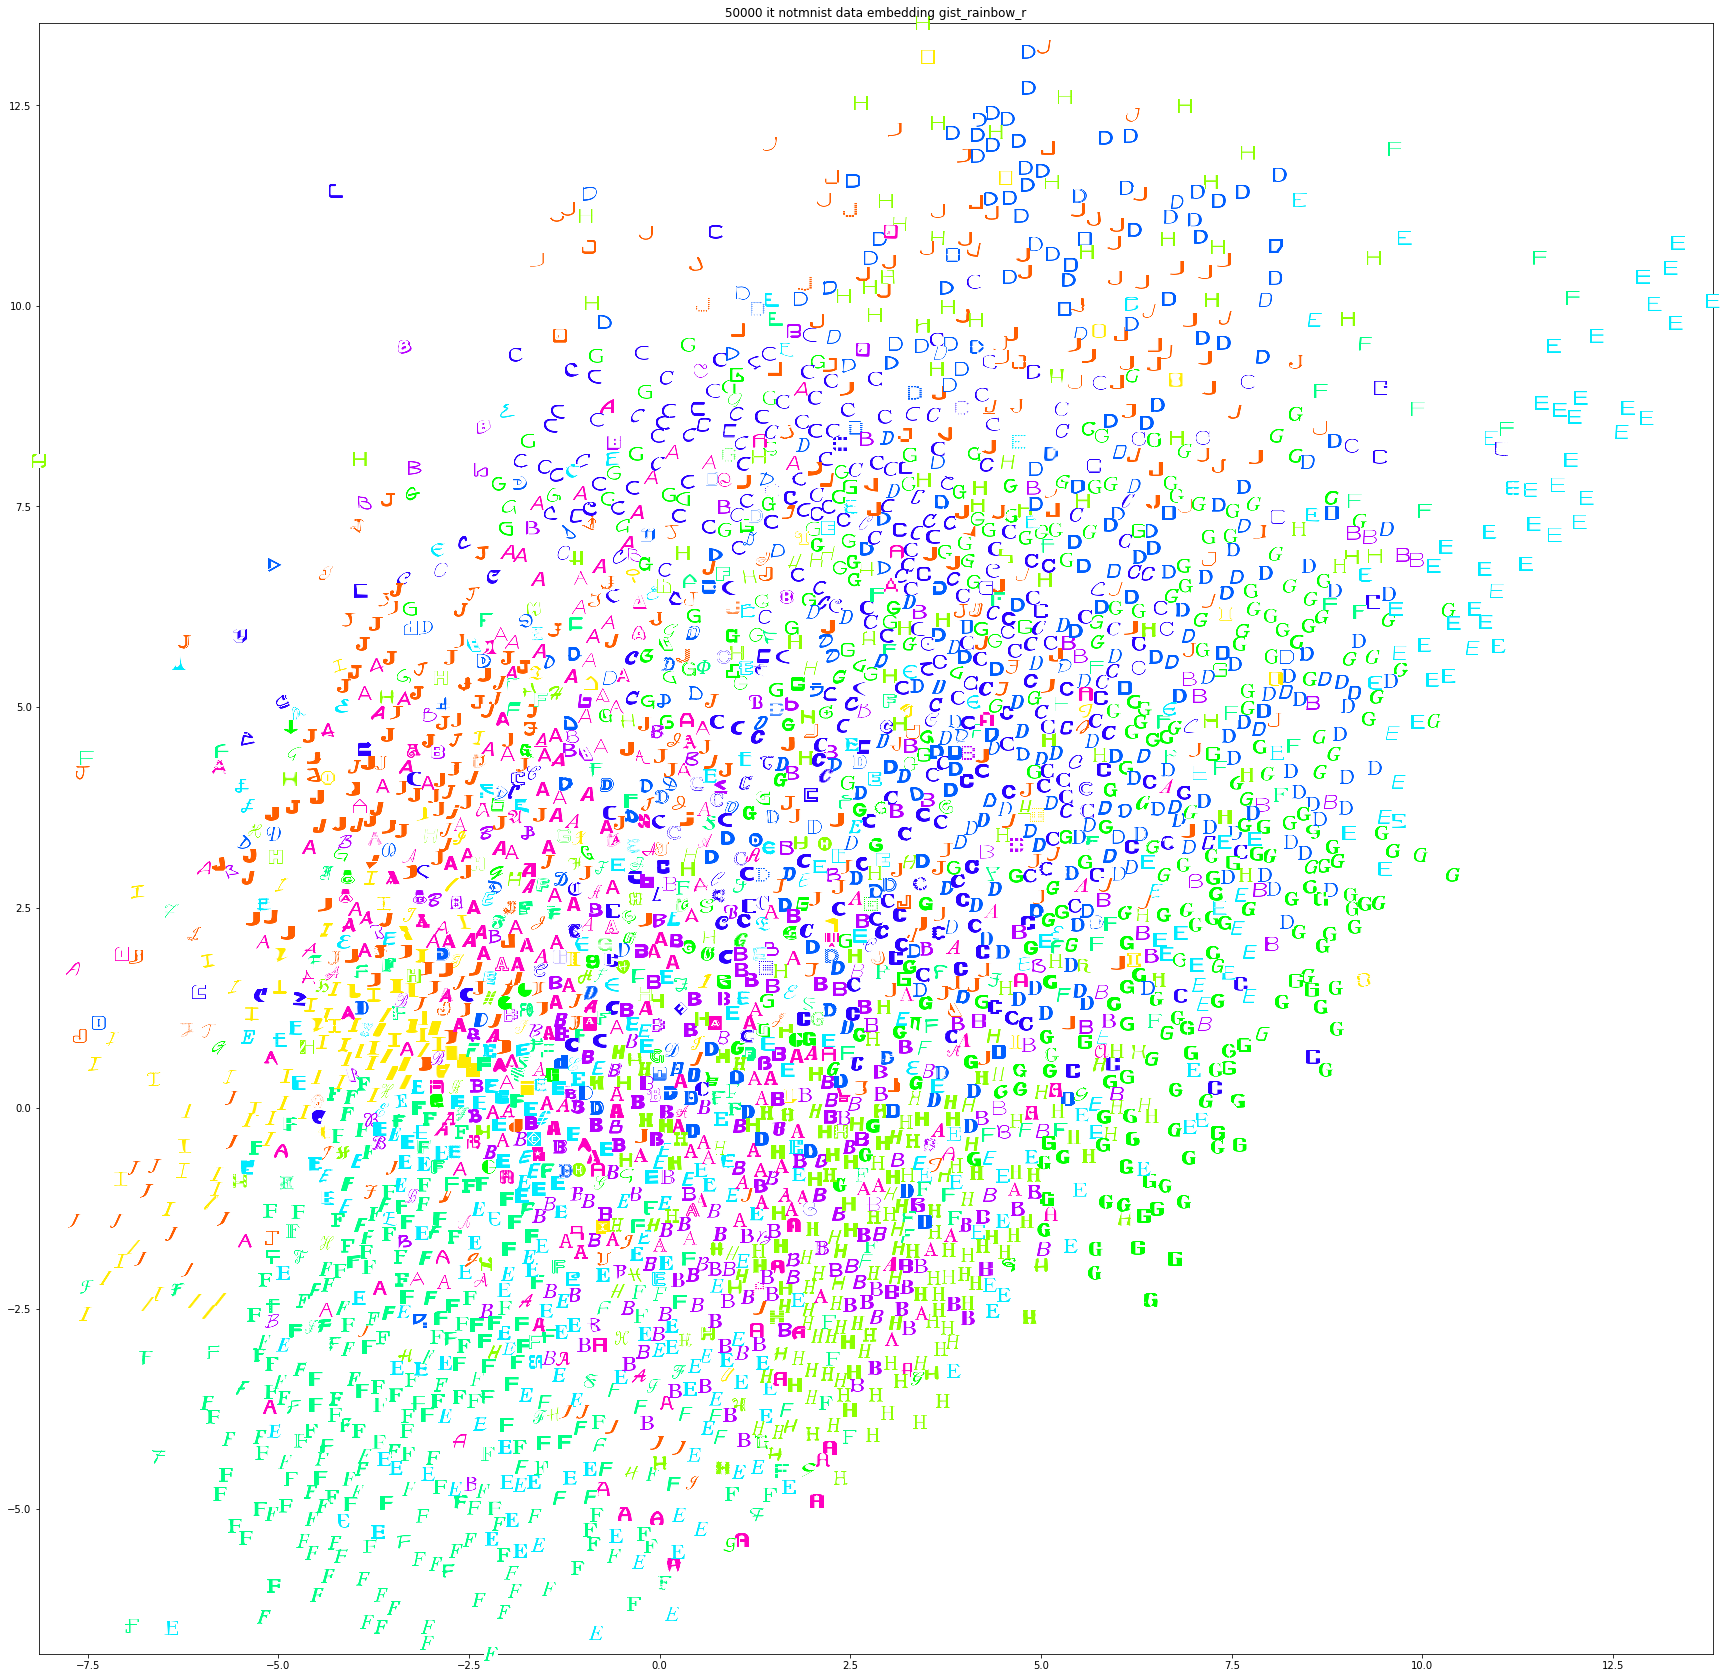

In [508]:
import random

visualize(embed_notMnist, notMnist_data_graph, notMnist_labels, 10, 'save',title='50000 it notmnist data embedding gist_rainbow_r',colormap='gist_rainbow_r')
allDone()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
PuBu


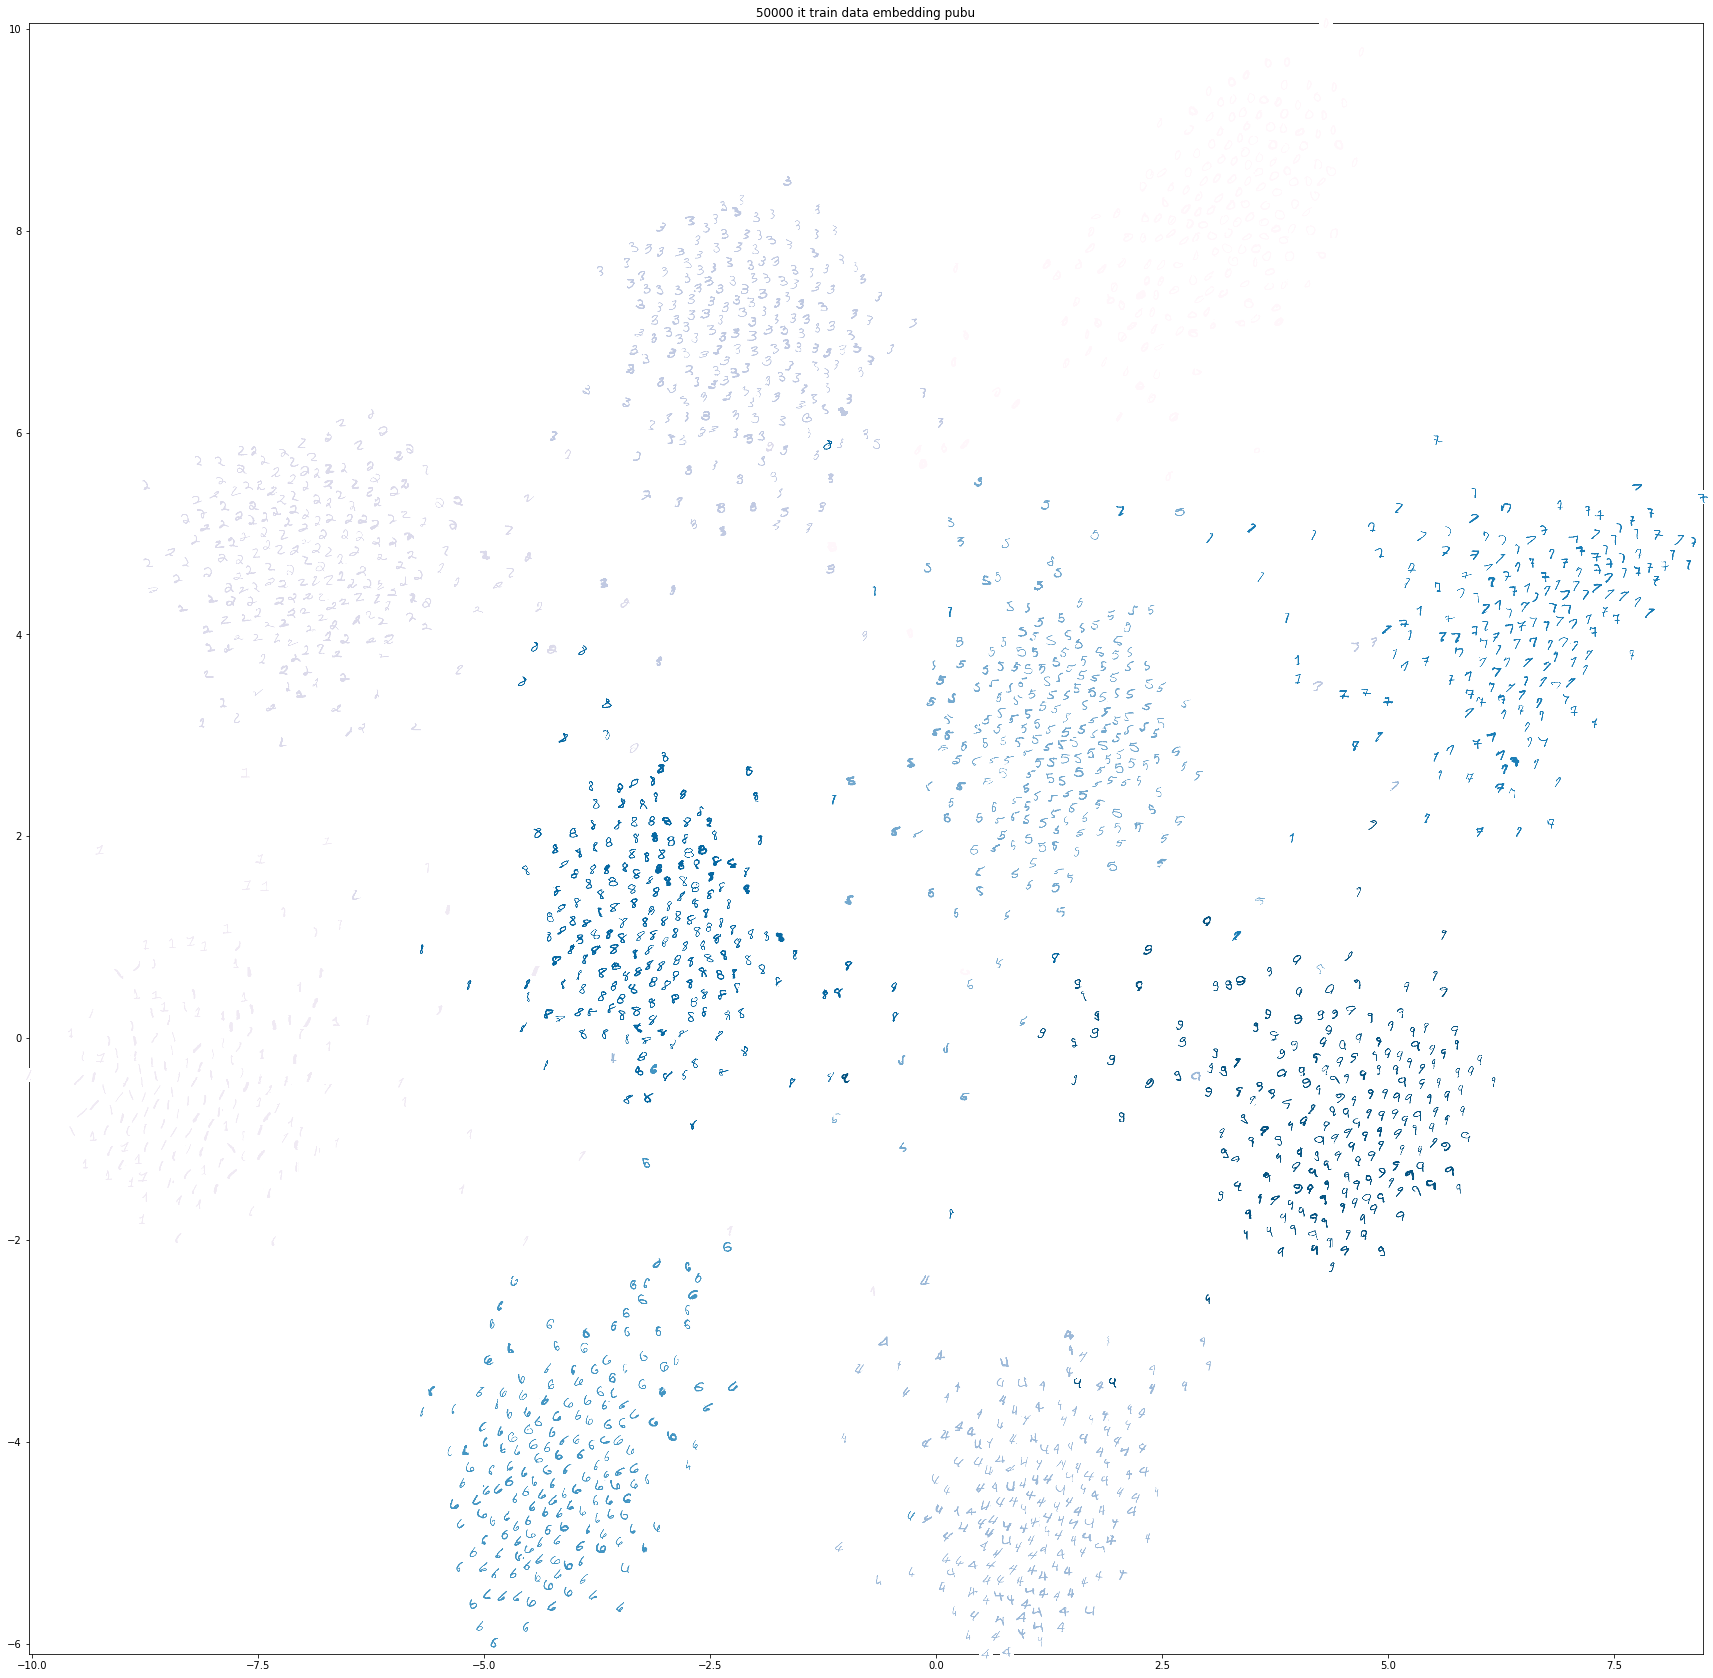

In [498]:
import random
mnist = input_data.read_data_sets('MNIST_data', one_hot=False)
mnist_train_data = mnist.train.images
mnist_train_data = mnist_train_data.reshape([-1, 28, 28])
mnist_train_labels = mnist.train.labels

visualize(embed_train, mnist_train_data, mnist_train_labels, 10, 'save',title='50000 it train data embedding pubu',colormap='PuBu')
allDone()

(65000, 28, 28)
seismic


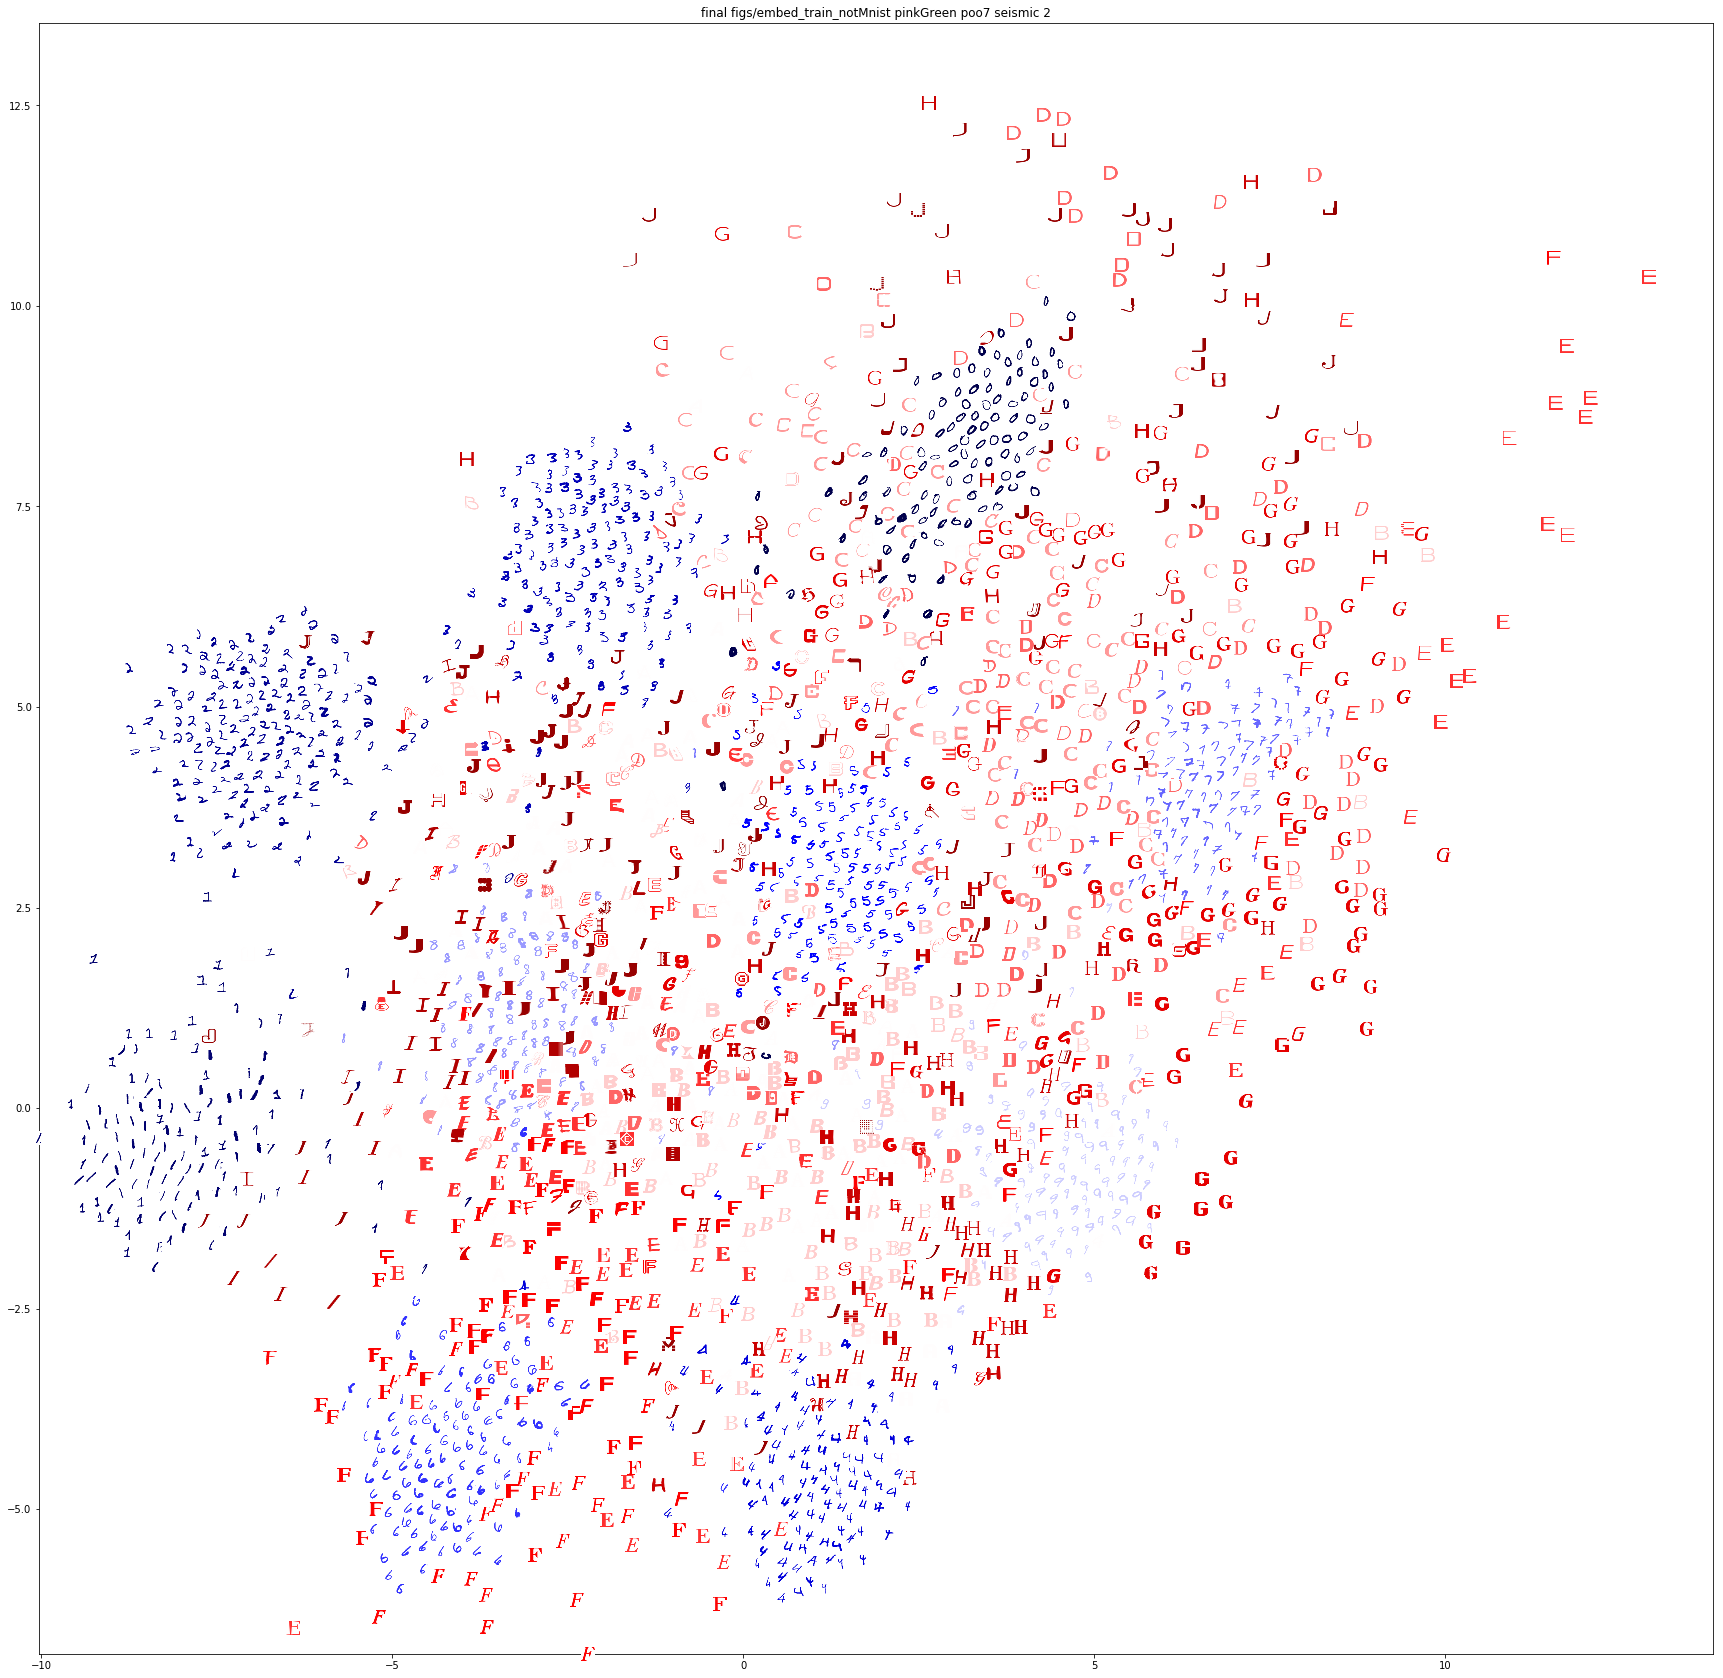

In [483]:
x_all_train = np.vstack((notMnist_data_graph,mnist_train_data))
y_all_train = np.hstack((notMnist_labels_plus10,mnist_train_labels))
embed_all_train = np.vstack((embed_notMnist,embed_train))
# np.savetxt('embed_train_notMnist pinkGreen.txt', embed_all_train,delimiter=',')

print x_all_train.shape

visualize(embed_all_train, x_all_train, y_all_train, 20, 'save',title='final figs/embed_train_notMnist pinkGreen poo7 seismic 2',colormap='seismic')
allDone()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


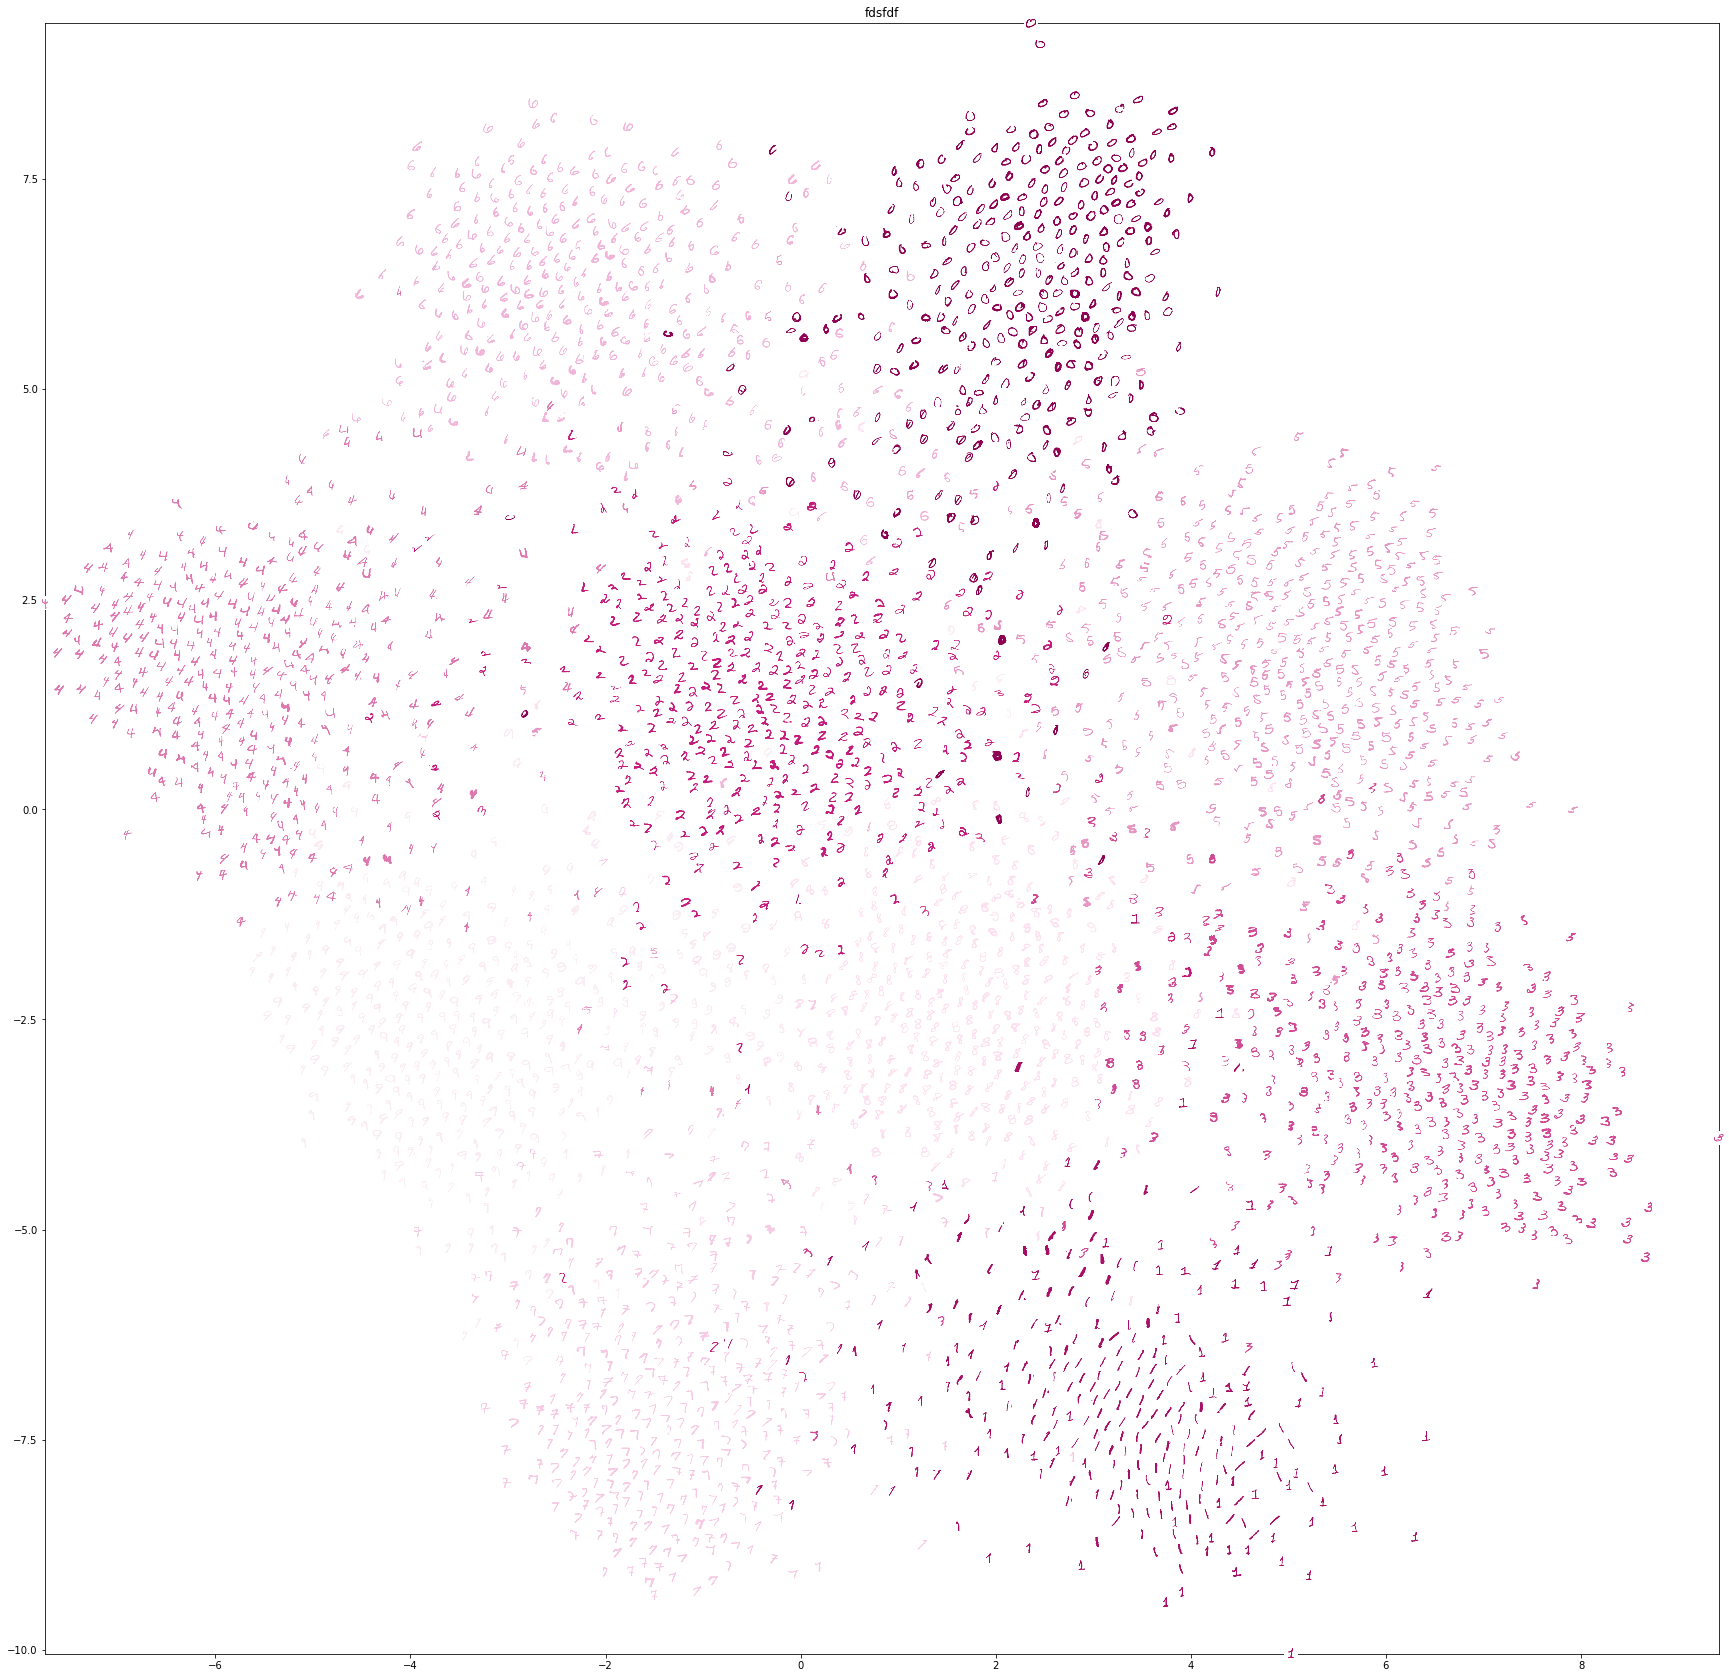

In [23]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=False)
mnist_train_data = mnist.train.images
mnist_train_data = mnist_train_data.reshape([-1, 28, 28])
mnist_train_labels = mnist.train.labels

visualize(embed_train, mnist_train_data, mnist_train_labels, 20, 'do not save',title='fdsfdf')
allDone()

# <font color=magenta> Simple scatter to differentiate train and oos . . . . .

In [424]:
plt.figure(figsize=(10,10))
plt.scatter([x[0] for x in embed_train],[x[1] for x in embed_train],s=2.5,alpha=0.15,c='blue') #'#00FFFF') #'#00FF00')
plt.scatter([x[0] for x in embed_notMnist],[x[1] for x in embed_notMnist],s=2.5,alpha=0.15,c='magenta') #'#FF0000')

plt.savefig('final figs/pooppp')

# <font color=magenta> Distribution of each class . . . . .

In [ ]:
mnist_train_data = mnist_train_data.reshape([-1, 28, 28])
mnist_train_labels = mnist.train.labels

In [416]:
print embed_train [:10]
print mnist_train_labels[:10]

[[ 6.7795267   4.0749006 ]
 [-1.7166109   6.7506723 ]
 [ 1.8950993  -3.8834934 ]
 [-4.5630927  -4.5136228 ]
 [-8.20658    -0.48567882]
 [-3.2215955   1.2345476 ]
 [-8.206431   -0.6297751 ]
 [ 3.6253812   8.420841  ]
 [ 4.9305816  -0.64845663]
 [-3.3246639   1.3318031 ]]
[7 3 4 6 1 8 1 0 9 8]


CLASS: 0 mean median dif
X stats:       3.405 3.447
Y stats:       8.467 8.518
--------------------------
Normed X mean and var: 3.405 0.369
Normed Y mean and var: 8.467 0.425 



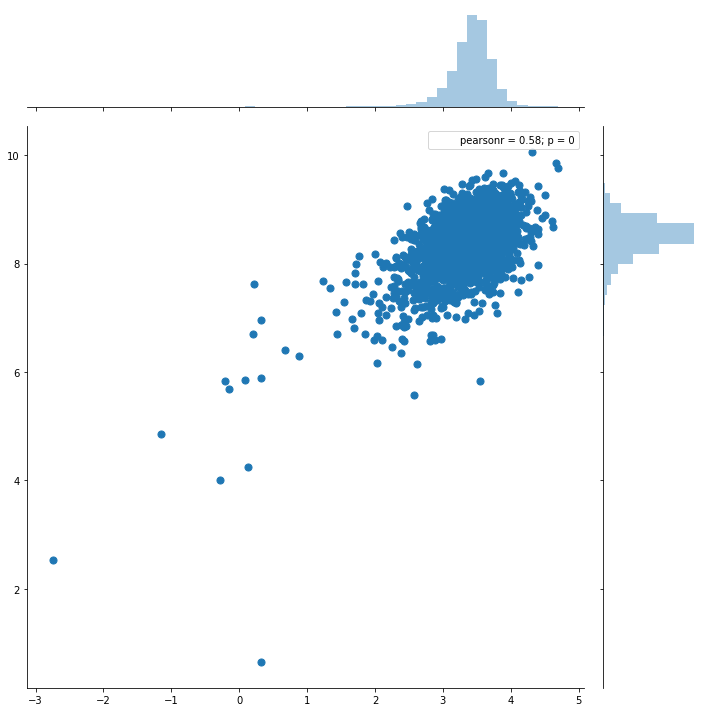

CLASS: 1 mean median dif
X stats:       -8.443 -8.461
Y stats:       -0.605 -0.621
--------------------------
Normed X mean and var: -8.443 0.361
Normed Y mean and var: -0.605 0.249 



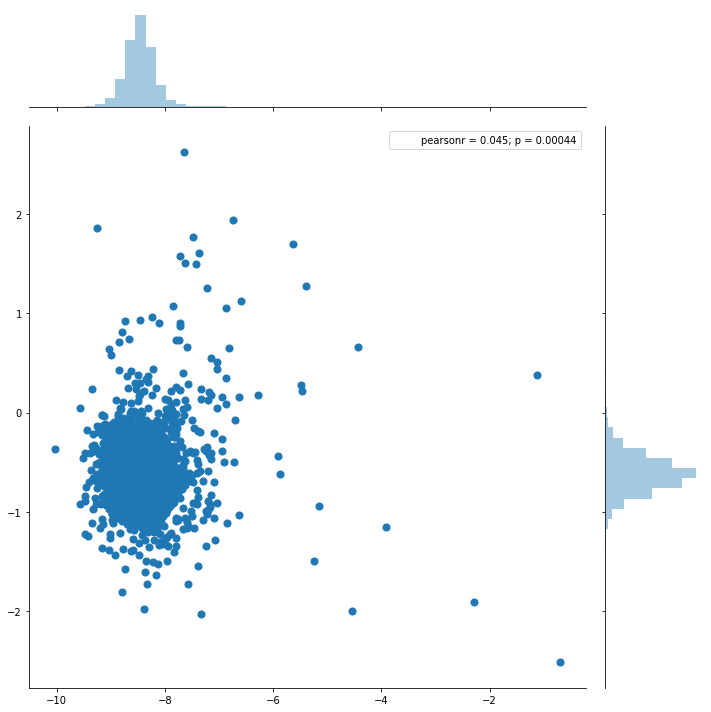

CLASS: 2 mean median dif
X stats:       -6.982 -7.0
Y stats:       4.883 4.908
--------------------------
Normed X mean and var: -6.982 0.43
Normed Y mean and var: 4.883 0.338 



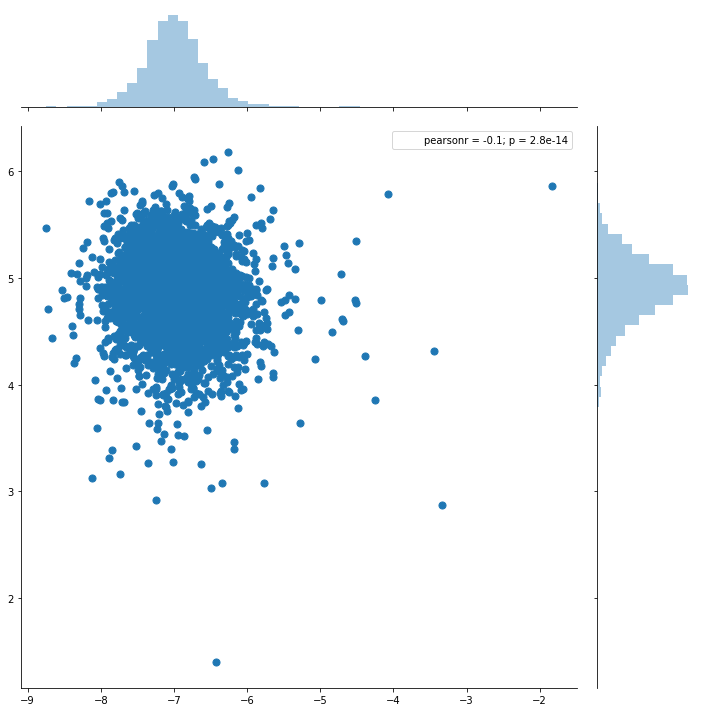

CLASS: 3 mean median dif
X stats:       -2.175 -2.196
Y stats:       7.168 7.191
--------------------------
Normed X mean and var: -2.175 0.414
Normed Y mean and var: 7.168 0.376 



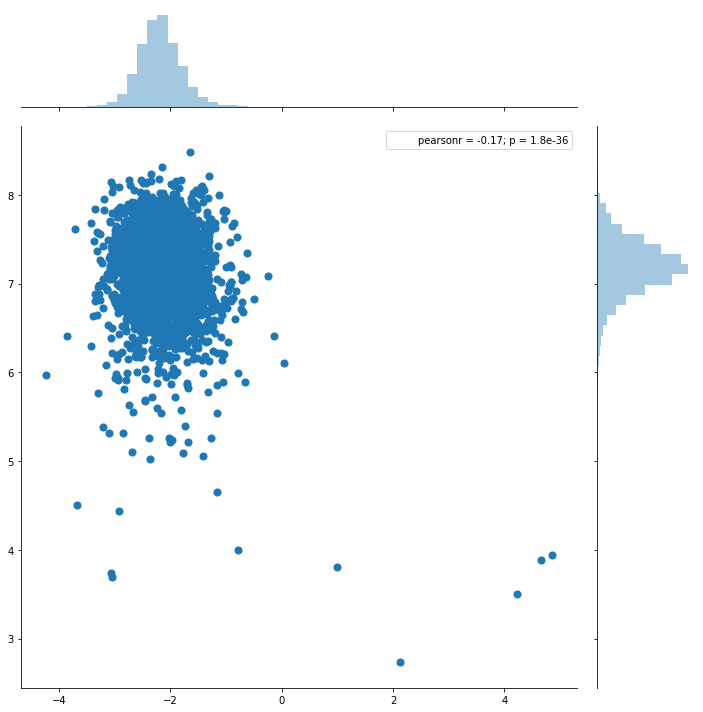

CLASS: 4 mean median dif
X stats:       1.138 1.14
Y stats:       -4.812 -4.824
--------------------------
Normed X mean and var: 1.138 0.299
Normed Y mean and var: -4.812 0.358 



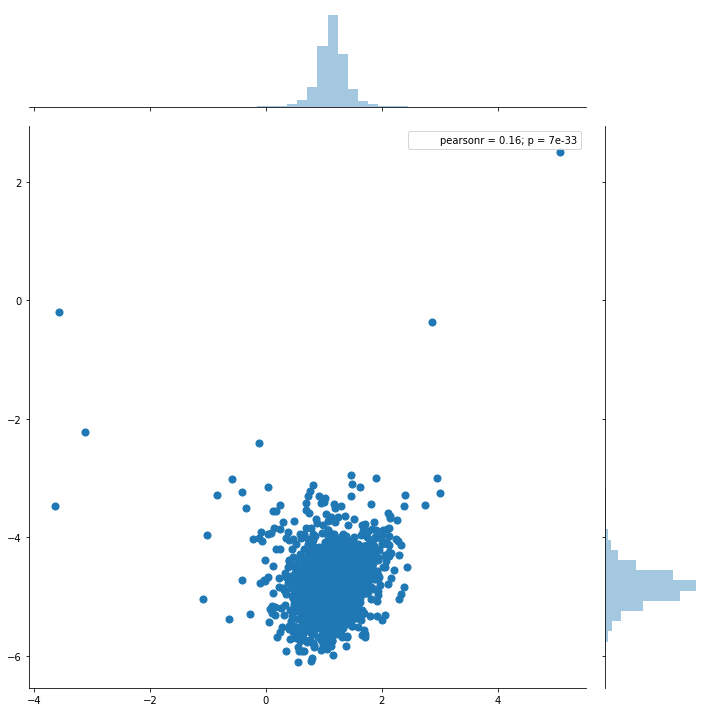

CLASS: 5 mean median dif
X stats:       1.468 1.477
Y stats:       3.072 3.085
--------------------------
Normed X mean and var: 1.468 0.339
Normed Y mean and var: 3.072 0.427 



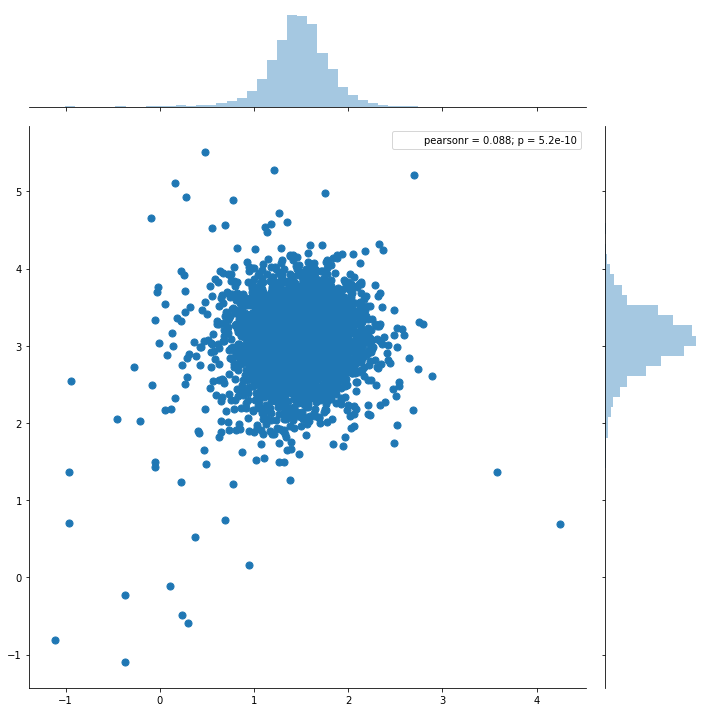

CLASS: 6 mean median dif
X stats:       -4.24 -4.253
Y stats:       -4.47 -4.485
--------------------------
Normed X mean and var: -4.24 0.304
Normed Y mean and var: -4.47 0.356 



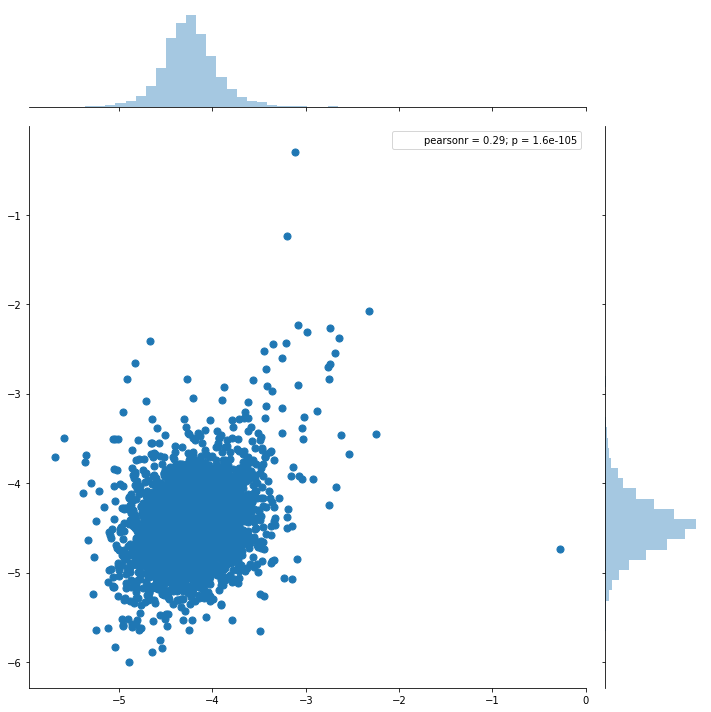

CLASS: 7 mean median dif
X stats:       6.709 6.71
Y stats:       4.189 4.2
--------------------------
Normed X mean and var: 6.709 0.389
Normed Y mean and var: 4.189 0.304 



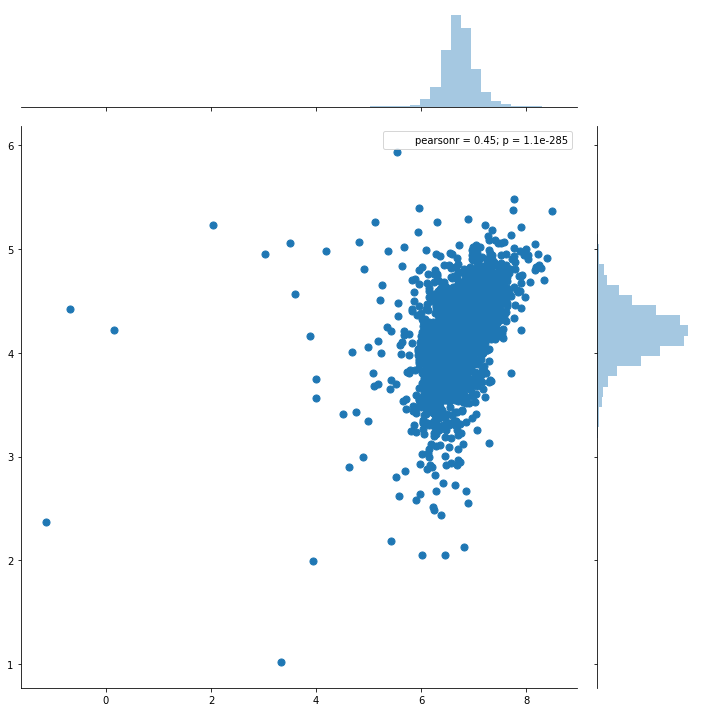

CLASS: 8 mean median dif
X stats:       -3.186 -3.203
Y stats:       1.062 1.06
--------------------------
Normed X mean and var: -3.186 0.367
Normed Y mean and var: 1.062 0.387 



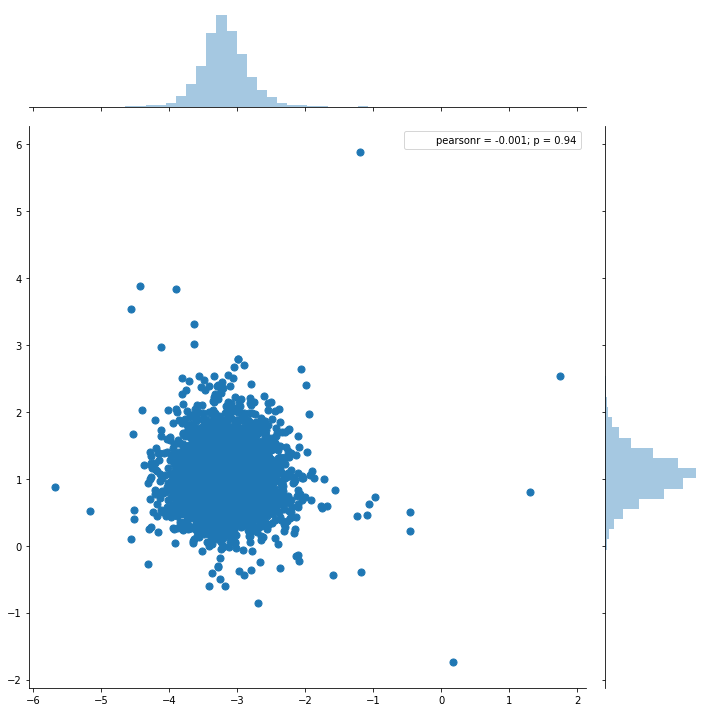

CLASS: 9 mean median dif
X stats:       4.821 4.858
Y stats:       -0.899 -0.906
--------------------------
Normed X mean and var: 4.821 0.378
Normed Y mean and var: -0.899 0.35 



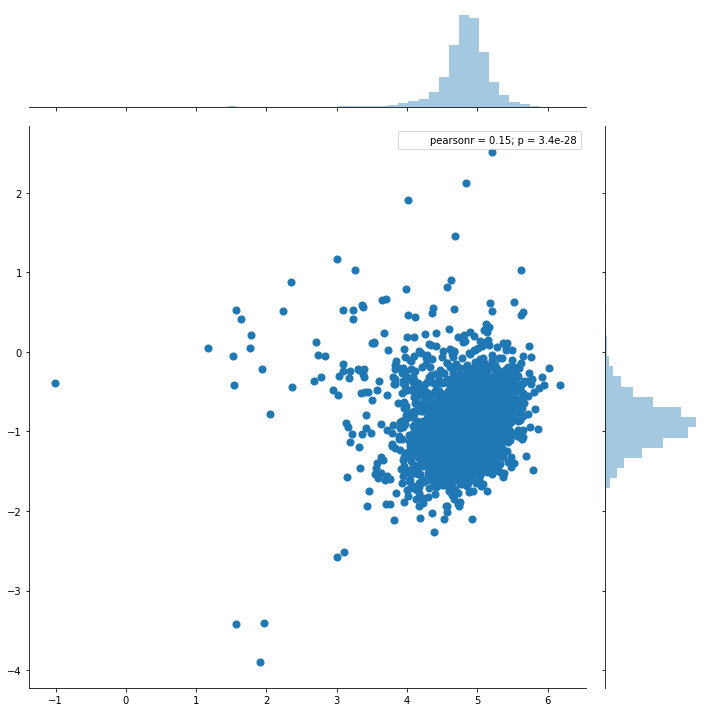

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
# from scipy.stats import norm
for i in range(10):
    lab = i
    idx_lab = np.where(mnist_train_labels==i)
    points = embed_train[idx_lab]
    labs = mnist_train_labels[idx_lab]
    print "CLASS:",i,"mean median dif"
    print "X stats:      ", round(np.mean(points[:,0]),3),round(np.median(points[:,0]),3)#,abs(np.mean(points[:,0])-np.median(points[:,0]))
    print "Y stats:      ",round(np.mean(points[:,1]),3),round(np.median(points[:,1]),3)#,abs(np.mean(points[:,1])-np.median(points[:,1]))
    
    
    mean,std=scipy.stats.norm.fit(points[:,0])
    print "--------------------------\nNormed X mean and var:",round(mean,3),round(std,3)
    
    mean,std=scipy.stats.norm.fit(points[:,1])
    print "Normed Y mean and var:",round(mean,3),round(std,3),"\n"
    
    sns.jointplot(points[:,0], points[:,1], s=50,size=10)
    plt.show()
    
#     print np.var(points[:0])
#     print stats.shapiro(points[:,0])
#     print stats.kstest(points[:,0],'norm'),"\n"
    

In [ ]:
# sns.jointplot(cdk1_x, cdk1_y, s=10)
for i,k in enumerate(sorted_x[:20]):
    
    cdk1_x = []
    cdk1_y = []
    for label, x, y in (zip(dict_BG.values(), pos_mds[:, 0], pos_mds[:, 1])):
        if label in presentKSDict[k[0]]:
            cdk1_x.append(x)
            cdk1_y.append(y)
    cdk1_x = numpy.array(cdk1_x)
    cdk1_y = numpy.array(cdk1_y)
    
    
    poo = sns.jointplot(cdk1_x, cdk1_y, s=50,size=10)
    poo.savefig("Figs2/MDS_pairplots/%d_%s" % (i,k[0]))

# <font color=magenta> Clustering on MNIST embedding . . . . .

In [34]:
from sklearn.cluster import SpectralClustering
from sklearn import metrics as skmetrics
from sklearn.cluster import KMeans

In [45]:
# MNIST ##############################

# specClust = SpectralClustering(10,affinity="nearest_neighbors")
# scLabels = specClust.fit_predict(embed)
# print "Spectral clustering"
# print "Silhouette:",skmetrics.silhouette_score(embed,scLabels)

# plt.figure(figsize=(7,7))
# plt.scatter(embed[:, 0], embed[:, 1], c=scLabels, s=3, alpha=0.5, cmap='viridis')
# plt.savefig('spectral clustering train data')
# plt.show()

KMeans clustering
Centers: [[-4.175072   -4.4042654 ]
 [-2.1626053   7.0188656 ]
 [ 6.6118703   4.160672  ]
 [-3.1041293   1.1422002 ]
 [-8.411029   -0.60510504]
 [ 3.4124255   8.46383   ]
 [ 4.730695   -0.90682113]
 [-6.8724647   4.929227  ]
 [ 1.1793336  -4.716285  ]
 [ 1.4015623   3.15827   ]]


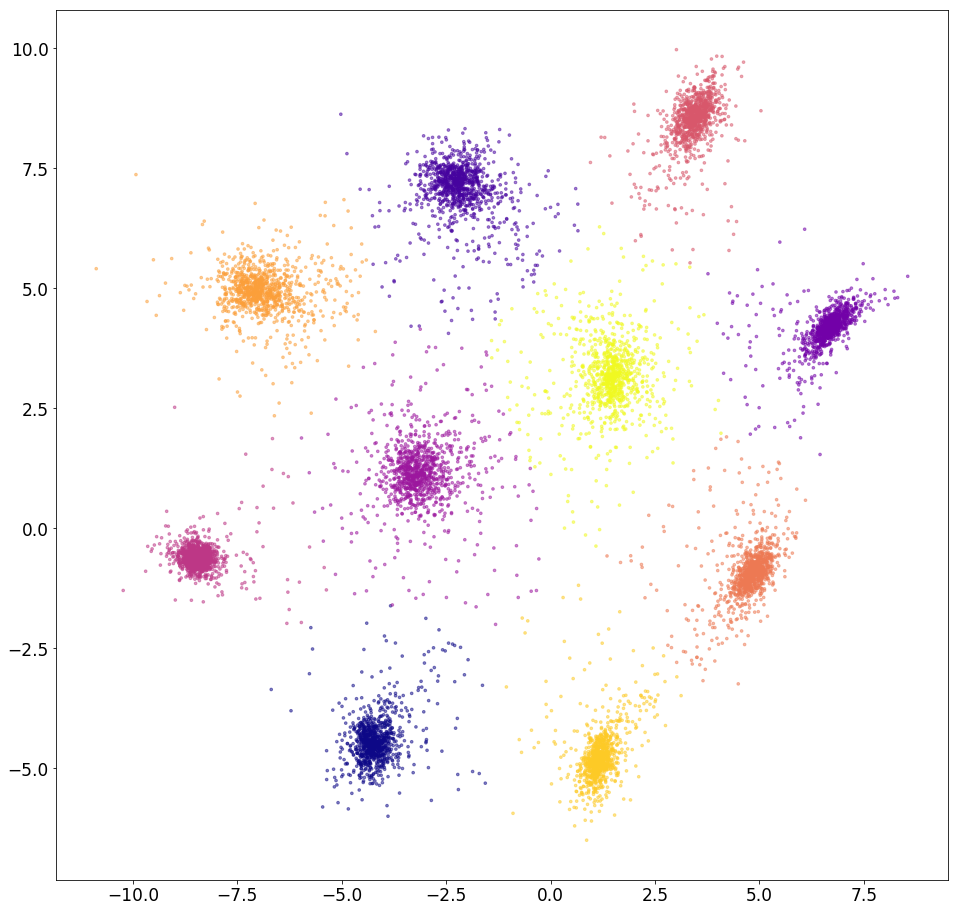

In [427]:
# MNIST + CENTROIDS ##############################

def kMeansScatter(embedding,title,myCmap='inferno',centers='yes'):

    kmeans = KMeans(n_clusters=10, random_state=0)
    kMLables = kmeans.fit_predict(embedding)
    print "KMeans clustering"
    # print "Silhouette:",skmetrics.silhouette_score(embed_train,kMLables)
    print "Centers:", kmeans.cluster_centers_
    poo = kmeans.cluster_centers_

    plt.figure(figsize=(16,16))
    plt.xticks(fontsize=17)
    plt.yticks(fontsize=17)
    plt.scatter(embedding[:, 0], embedding[:, 1], c=kMLables, s=7, alpha=0.5, cmap=myCmap)
    if centers=='yes':
        plt.scatter(poo[:,0],poo[:,1], s=80, c='#00FF00') #00FF00'
#     plt.savefig(title)
    plt.show()
    
kMeansScatter(embed,'poo2','plasma','no')

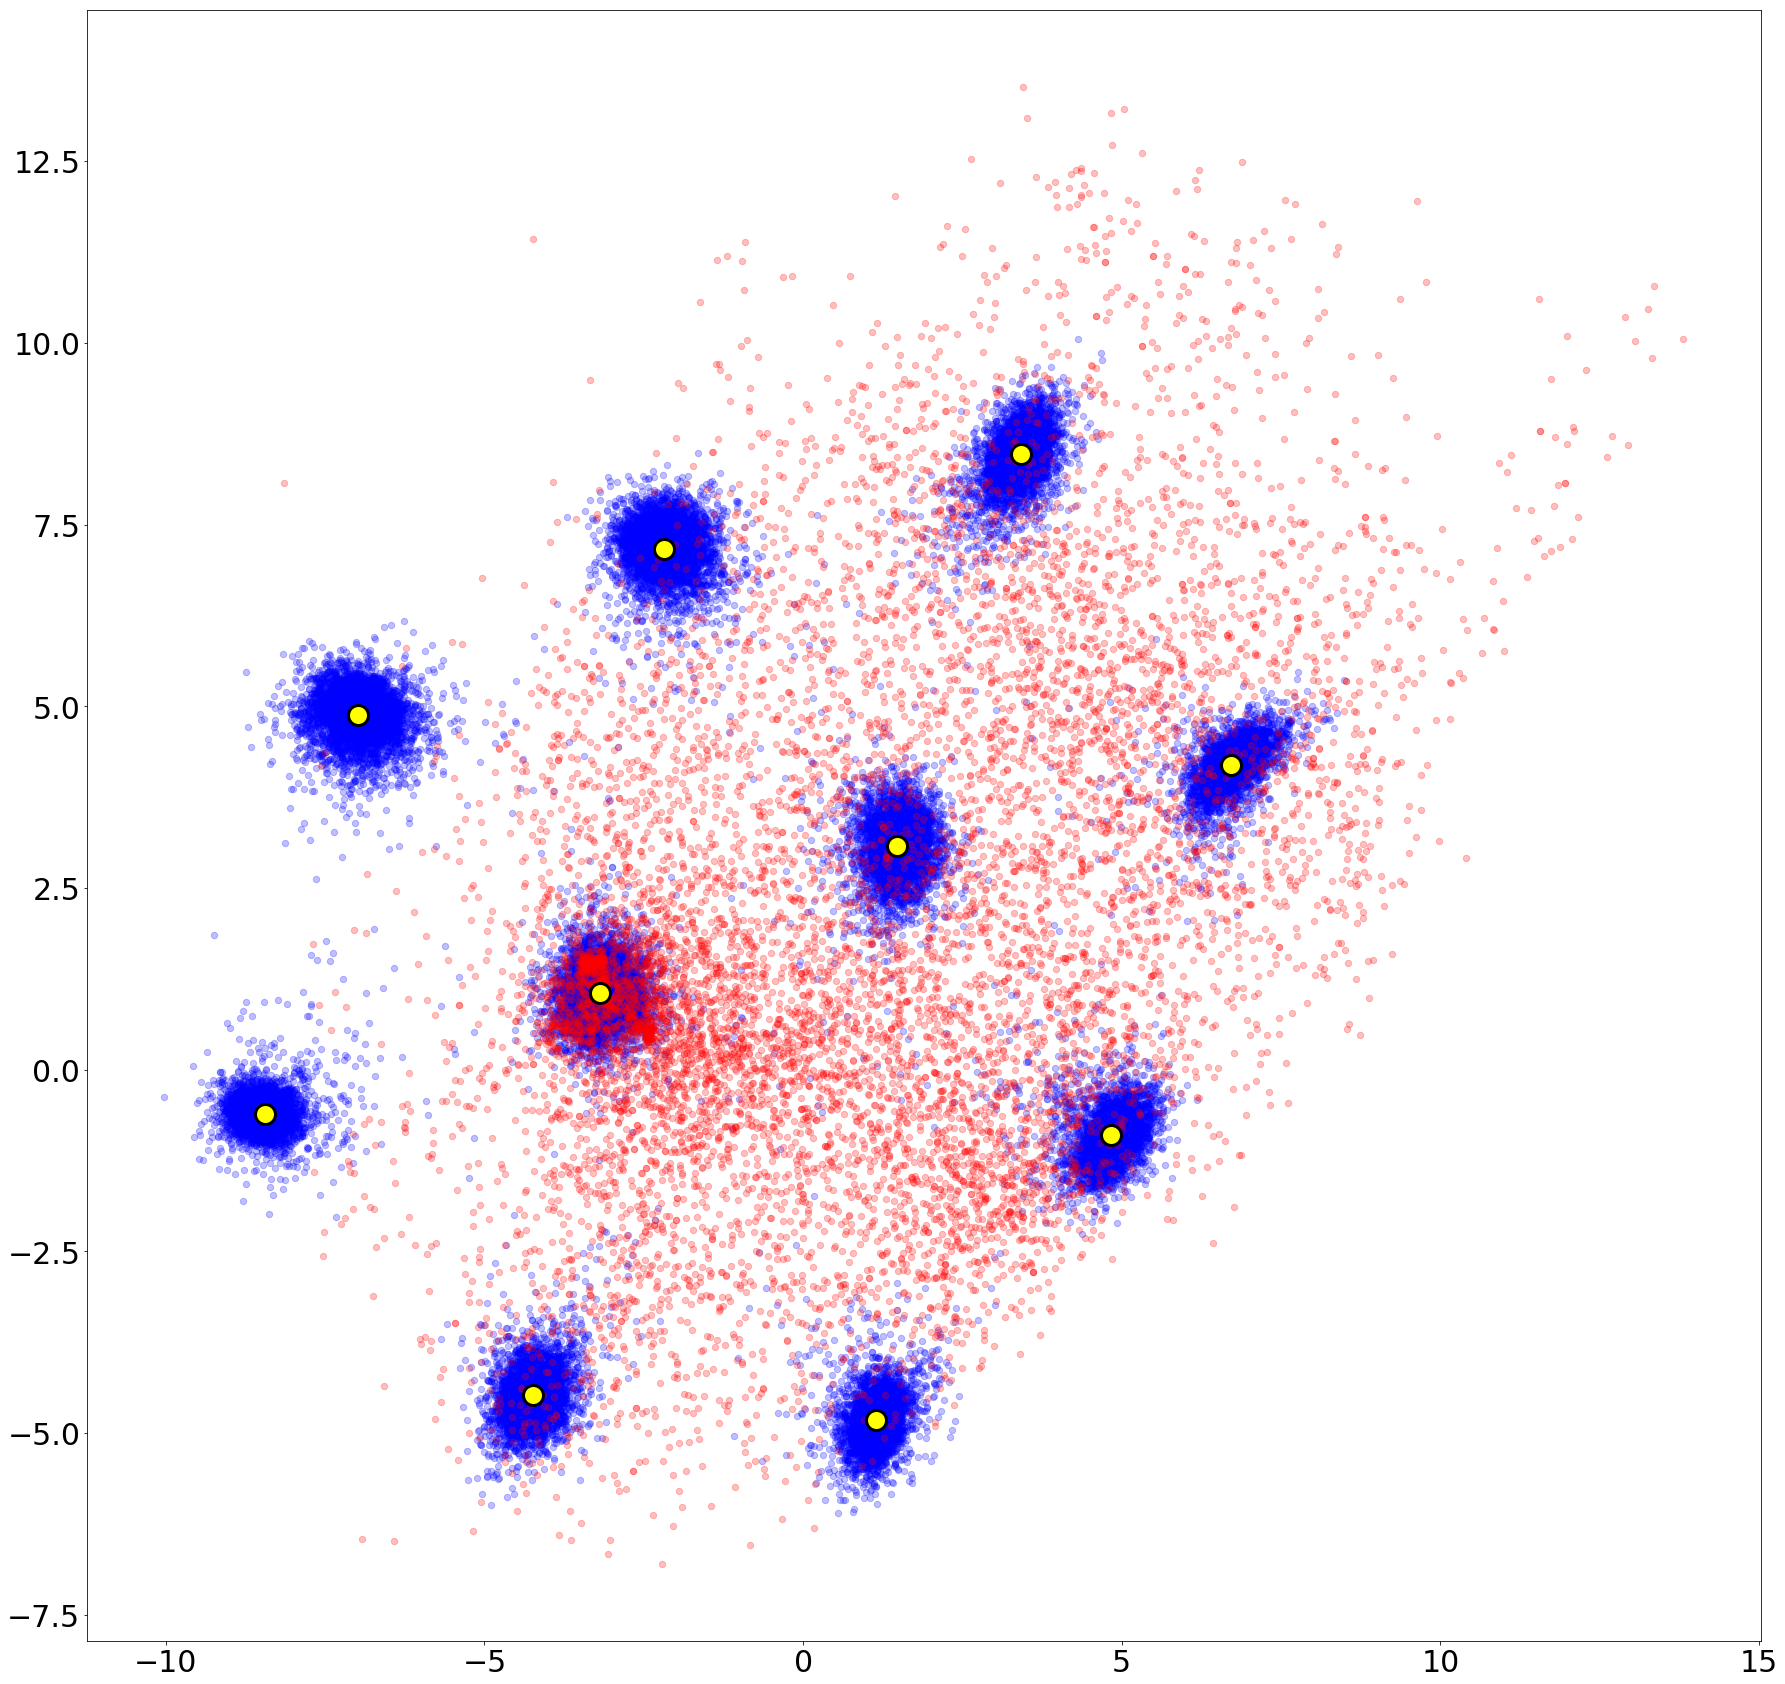

In [526]:
# MNIST + NOT MNIST ##############################
######### NOTE: originally did alpha 0.15 #################


plt.figure(figsize=(30,30))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.scatter([x[0] for x in embed_train],[x[1] for x in embed_train],s=40,alpha=0.25,c='blue') #'#00FF00') #'#00FFFF') #'#00FF00')
plt.scatter([x[0] for x in embed_notMnist],[x[1] for x in embed_notMnist],s=40,alpha=0.25,c='red') #'magenta') #'#FF0000')
# plt.scatter(poo[:,0],poo[:,1], s=180, c='yellow') #'orange') #00FF00'
plt.scatter(poo[:,0],poo[:,1], s=400, c='yellow', edgecolors='black',linewidth=3) #'orange') #00FF00'

plt.savefig('final figs/compare blue red yes cents alpha point 25 big fonts')
plt.show()


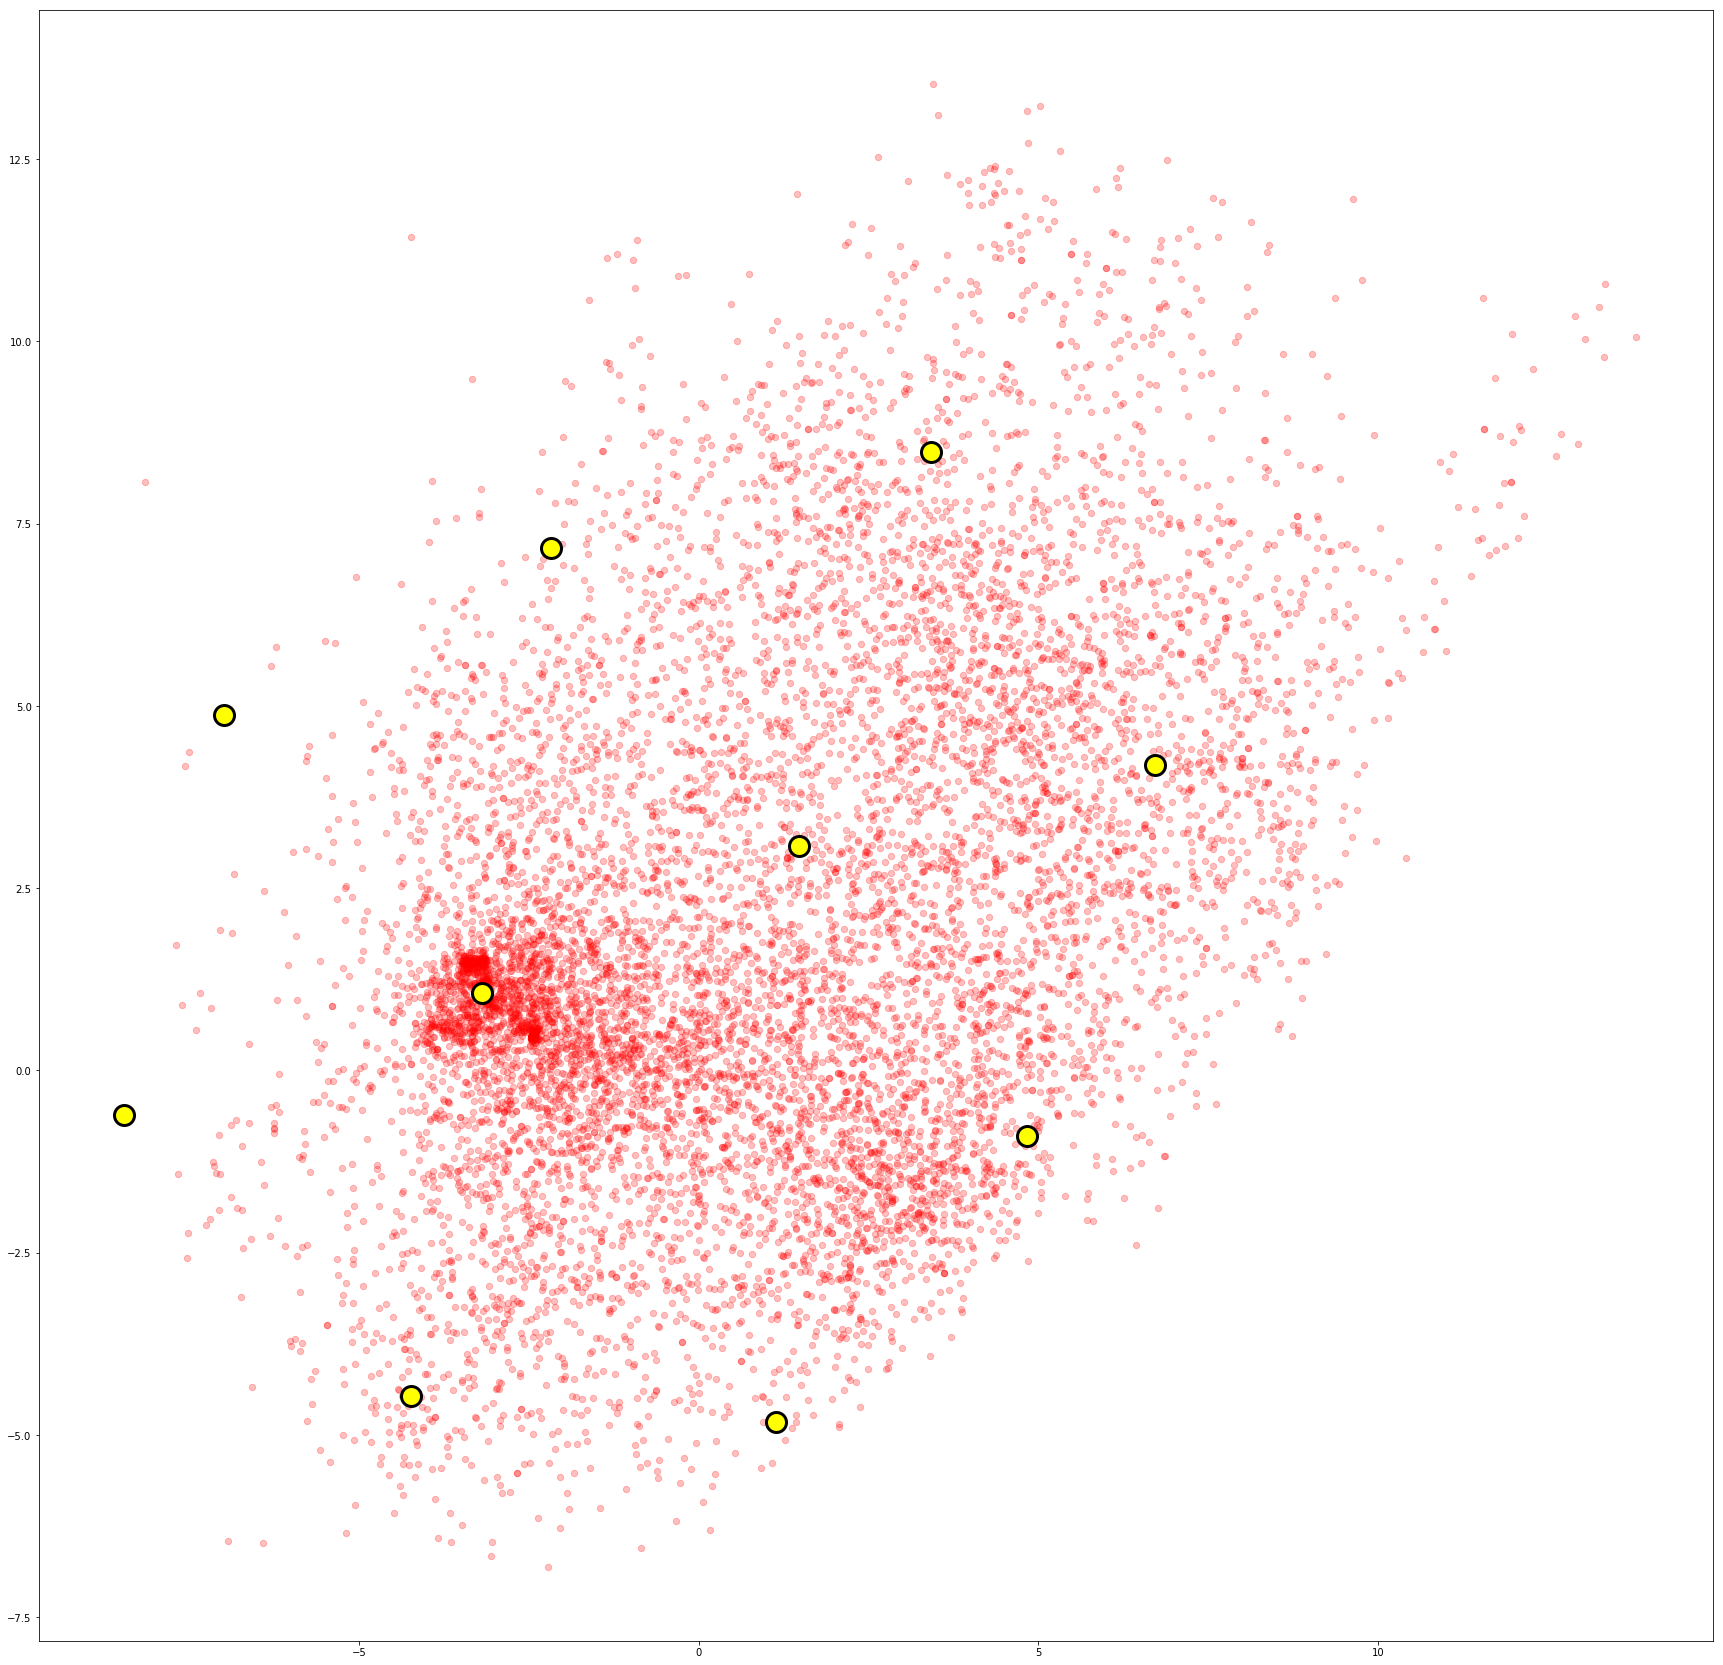

In [521]:
# NOT MNIST ##############################

plt.figure(figsize=(30,30))
plt.scatter([x[0] for x in embed_notMnist],[x[1] for x in embed_notMnist],s=40,alpha=0.25,c='red') #'magenta') #'#FF0000')
plt.scatter(poo[:,0],poo[:,1], s=400, c='yellow', edgecolors='black',linewidth=3) #'orange') #00FF00'

plt.savefig('final figs/not mnist red no cents alpha point 25 yes cents 3')
plt.show()

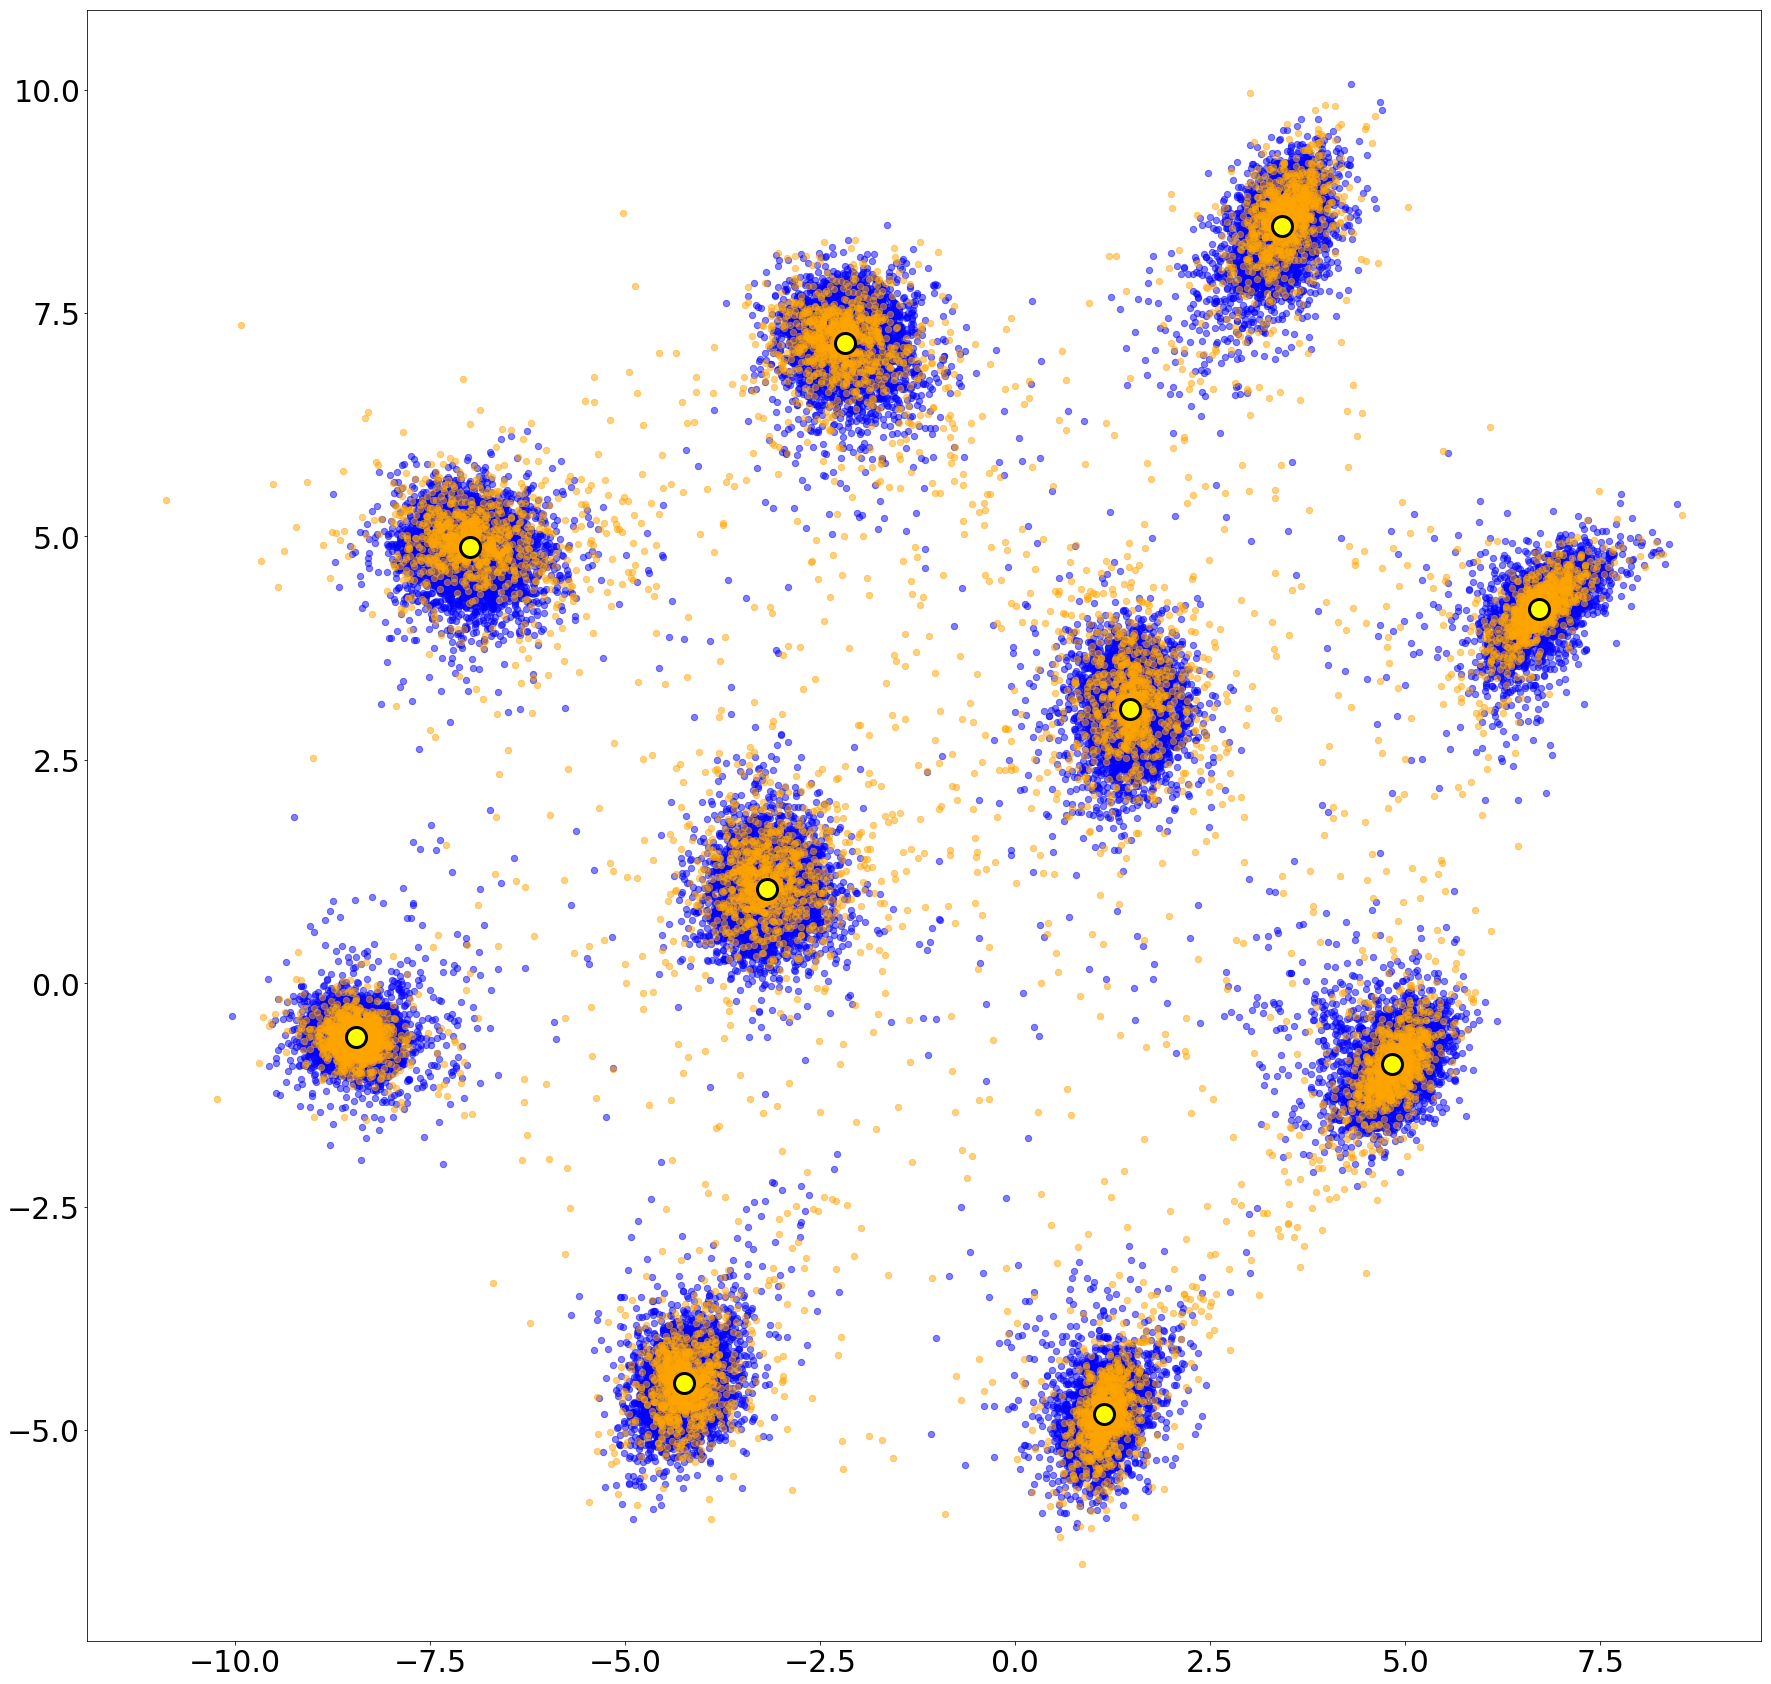

In [527]:
# MNIST TEST + MNIST TRAIN ##############################

plt.figure(figsize=(30,30))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.scatter([x[0] for x in embed_train],[x[1] for x in embed_train],s=40,alpha=0.5,c='blue') #'#00FF00') #'#00FFFF') #'#00FF00')
plt.scatter([x[0] for x in embed],[x[1] for x in embed],s=40,alpha=0.5,c='orange') #'magenta') #'#FF0000')
# plt.scatter(poo[:,0],poo[:,1], s=320, c='yellow') #'orange') #00FF00'
plt.scatter(poo[:,0],poo[:,1], s=400, c='yellow', edgecolors='black',linewidth=3) #'orange') #00FF00'

plt.savefig('final figs/mnist train and test blue orange yes cents big fonts')
plt.show()

# <font color=magenta> Compare embedded data points to centroid location . . . . .

Considered the centoids of the mnist train embedding. Compared the embedded points of the mnist test embedding (in-dist) and the notmnist test embedding (out-out-dist). found the exponential of the negative euclidean distance of each test point to each centroid. took the mean of the distances for both the in-dist and out-of-dist sets. graphed these and found the overlap between their histograms.

In [537]:
def return_intersection(hist_1, hist_2):
    minima = np.minimum(hist_1, hist_2)
    intersection = np.true_divide(np.sum(minima), np.sum(hist_2))
    return intersection

In [542]:
import math
import numpy as np

kmeans = KMeans(n_clusters=10, random_state=0)
kMLables = kmeans.fit_predict(embed_train)
poo = kmeans.cluster_centers_

embed_all = np.vstack((embed_notMnist,embed))
x_all = np.vstack((notMnist_data_graph,mnist_test_data))
y_all = np.hstack((notMnist_labels_plus10,mnist_test_labels))

samp_outOfDist = []
samp_inDist = [] 
randy = random.sample(range(20000),10000)

for i in randy:
    if y_all[i]<10 and len(samp_inDist)!=5000:
        samp_inDist.append(i)
    elif y_all[i]>=10 and len(samp_outOfDist)!=5000:
        samp_outOfDist.append(i)
        
def getDistances(distance,stat):
    
# in-distibution  ####################################  

    vars_outOfDist = []
    vars_inDist = []

    for idx in samp_inDist:
        dists = []
        s = embed_all[idx]
        for c in poo: # poo => kmeans.cluster_centers_
            if distance=='exp':
                myDistance = np.exp(-np.linalg.norm(c-s))
            elif distance=='L1':
                myDistance = abs(c[0]-s[0]) + abs(c[1]-s[1])
            elif distance=='L2':
                myDistance = math.sqrt((c[0]-s[0])**2 + (c[1]-s[1])**2)
            dists.append(myDistance)
            
        if stat=='var':
            myStat = (np.var(np.array(dists)))
        elif stat=='mean':
            myStat = np.mean(np.array(dists))
        elif stat=='median':
            myStat = np.median(np.array(dists))
        elif stat=='min':
            myStat = np.min(np.array(dists))
        elif stat=='-min':
            myStat = (np.min(np.array(dists)))
        vars_inDist.append(myStat)
        
# out-of-distibution  ####################################    

    for idx in samp_outOfDist:
        dists = []
        s = embed_all[idx]
        for c in poo: # poo => kmeans.cluster_centers_
            if distance=='exp':
                myDistance = np.exp(-np.linalg.norm(c-s))
            elif distance=='L1':
                myDistance = abs(c[0]-s[0]) + abs(c[1]-s[1])
            elif distance=='L2':
                myDistance = math.sqrt((c[0]-s[0])**2 + (c[1]-s[1])**2)
            dists.append(myDistance)
            
        if stat=='var':
            myStat = (np.var(np.array(dists)))
        elif stat=='mean':
            myStat = np.mean(np.array(dists))
        elif stat=='median':
            myStat = np.median(np.array(dists))
        elif stat=='min':
            myStat = np.min(np.array(dists))
        elif stat=='-min':
            myStat = (np.min(np.array(dists)))
        vars_outOfDist.append(myStat)
        
    return vars_inDist, vars_outOfDist
    


In [ ]:
Overlaps: 
    - L1, median: 0.5862626262626263
    - L1, mean: 0.5291271920983672
    - L1, var: 0.5462626262626262
    - L1, min: 0.3556
    - L2, median: 0.4843781495666196
    - L2, mean: 0.5418012924071083
    - L2, var: 0.5774505849132715
    - L2, min: 0.3548
    - exp, var: 0.3443830570902394
    - exp, mean: 0.3461459824166837
    - exp, median: 0.5522662311147407
    - exp, min: 0.7378137315909562

In [539]:
poo1 = 'exp'
poo2 = 'mean'
myVars_inDist = getDistances(poo1,poo2)[0]
myVars_outOfDist = getDistances(poo1,poo2)[1]

0.896904388777555


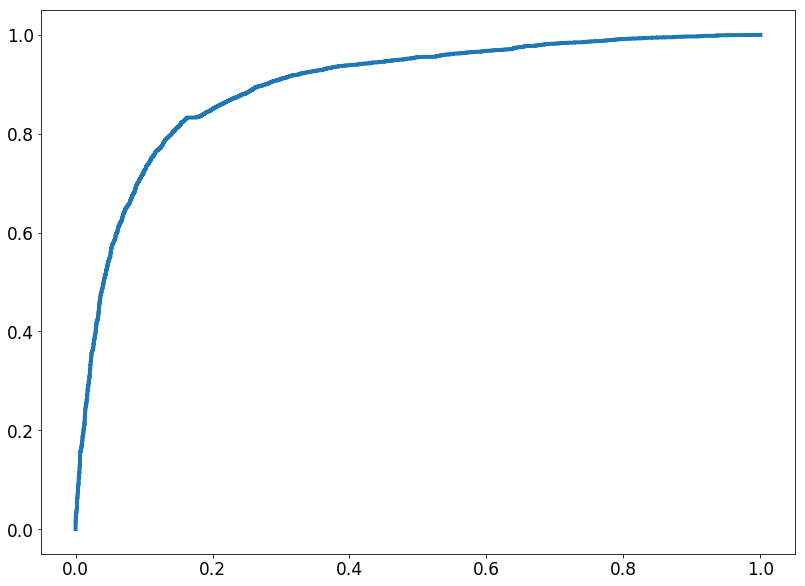

In [540]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_true = np.concatenate( ( np.ones(len(myVars_inDist )), np.zeros(len( myVars_outOfDist)) ) )
# print -min(myVars_inDist)
y_score = np.concatenate(( myVars_inDist , myVars_outOfDist))
fpr, tpr, thresholds = roc_curve(y_true, y_score)
auc_metric = auc(fpr, tpr)

print(auc_metric)

plt.figure(figsize=(13.5,10))
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.plot(fpr, tpr, linewidth=4)

# plt.savefig('final figs/ROC Exp mean _ 89424')
plt.show()

5000


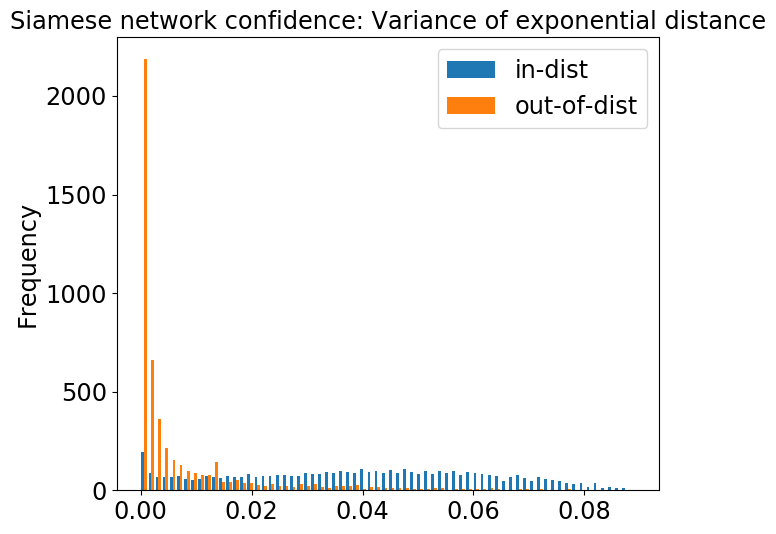

0.3439918533604888


In [562]:
myDist = 'exp'
myStat = 'var'

myVars_inDist = getDistances(myDist,myStat)[0]
myVars_outOfDist = getDistances(myDist,myStat)[1]

print len(myVars_inDist)

plt.figure(figsize=(10,8),dpi=100)
plt.title("Siamese network confidence: Variance of exponential distance",fontsize='xx-large')
plt.hist([myVars_inDist, myVars_outOfDist], bins=70, label=['in-dist', 'out-of-dist'])
plt.legend(fontsize='xx-large')
plt.ylabel("Frequency",fontsize='xx-large')
# plt.xlabel("Variances of exponential of the Eucliean distance to each centroid, per data point",fontsize=17)
plt.xticks(fontsize='xx-large')
plt.yticks(fontsize='xx-large')
# plt.tight_layout()
plt.savefig("final figs/Exp,var_new")
plt.show()

minBin = min(min(myVars_inDist), min(myVars_inDist))
maxBin = max(max(myVars_outOfDist), max(myVars_outOfDist))

hist1, bins1 = np.histogram(myVars_inDist,bins=25,range=(minBin,maxBin))
hist2, bins2 = np.histogram(myVars_outOfDist,bins=25,range=(minBin,maxBin))
print return_intersection(hist1,hist2)

Overlaps: 
    - L1, median: 0.5862626262626263
    - L1, mean: 0.5291271920983672
    - L1, var: 0.5462626262626262
    - L1, min: 0.3556
    - L2, median: 0.4843781495666196
    - L2, mean: 0.5418012924071083
    - L2, var: 0.5774505849132715
    - L2, min: 0.3548
    - exp, var: 0.3443830570902394
    - exp, mean: 0.3461459824166837
    - exp, median: 0.5522662311147407
    - exp, min: 0.7378137315909562
    

In [184]:
from scipy import stats
print stats.ttest_ind(vars_inDist, vars_outOfDist)

Ttest_indResult(statistic=90.89799265448666, pvalue=0.0)
1


In [234]:
hist1, bins1 = np.histogram(vars_inDist,bins=25)
hist2, bins2 = np.histogram(vars_outOfDist,bins=25)

def return_intersection(hist_1, hist_2):
    minima = np.minimum(hist_1, hist_2)
    intersection = np.true_divide(np.sum(minima), np.sum(hist_2))
    return intersection

print return_intersection(hist1,hist2)

0.04810078259209773


# <font color=magenta> Do "10-way one shot" . . . . .

In [142]:
def compare(oOS_im,oOS_lab,oOS_img,distance,stat):
    
    randy = random.sample(range(wIS_images.shape[0]), wIS_images.shape[0])

    wISDict = {} # never actually use this
    wISTest = []
    randies = []
    for i in randy:
        if wIS_labels[i] not in wISDict.keys():
            wISDict[wIS_labels[i]]=i
            wISTest.append(wIS_images[i])
            randies.append(i)
        if len(wISDict)==10:
            break

    wISTest = np.array(wISTest) 

    wIS_im = wIS_images[randies]
    wIS_lab = wIS_labels[randies]
    wIS_img = wIS_images_graph[randies]
    
    
    testIt_labs = np.hstack((oOS_lab,wIS_lab))
    testIt_ims = np.vstack((oOS_im,wISTest))
    
    embed_poo5 = siamese.o1.eval({siamese.x1: testIt_ims})
    ofInterest = embed_poo5[0]
    
    dists = []
    for coord in embed_poo5[1:]:
        if distance=='exp':
            myDistance = np.exp(-np.linalg.norm(coord-ofInterest))
        elif distance=='L1':
            myDistance = abs(coord[0]-ofInterest[0]) + abs(coord[1]-ofInterest[1])
        elif distance=='L2':
            myDistance = math.sqrt((coord[0]-ofInterest[0])**2 + (coord[1]-ofInterest[1])**2)
        dists.append(myDistance)
    dists = np.array(dists)
        
    correct = 0
    if testIt_labs[(np.argmin(dists)+1)]==testIt_labs[0]:
        correct = 1
        
    oOS_img = oOS_img.reshape((1,28,28))
    oOS_lab = oOS_lab.reshape((1,))
    x = np.vstack((oOS_img,wIS_img))
    y = np.hstack((oOS_lab,wIS_lab))
    
    frac = float(np.min(dists))/sum(dists)
    
    if stat=='var':
        myStat = np.var(dists)
    elif stat=='mean':
        myStat = np.mean(dists)
    elif stat=='median':
        myStat = np.median(dists)
    vars_outOfDist.append(myStat)
    
    return [embed_poo5,x,y,dists,myStat]

In [143]:
notMnist_siam = input_data.read_data_sets("notMNIST_data_real", one_hot=False) # for siamese embedding !!!

wIS_images = mnist.train.images # from training data (within samp)
wIS_labels = mnist.train.labels
wIS_images_graph = wIS_images.reshape([-1, 28, 28])

wIS_images_test = mnist.test.images # from training data (within samp)
wIS_labels_test = mnist.test.labels
wIS_images_test_graph = wIS_images_test.reshape([-1, 28, 28])

oOS_images = notMnist_siam.test.images
oOS_labels = notMnist_labels_plus10
oOS_images_graph = oOS_images.reshape([-1, 28, 28])

Extracting notMNIST_data_real/train-images-idx3-ubyte.gz
Extracting notMNIST_data_real/train-labels-idx1-ubyte.gz
Extracting notMNIST_data_real/t10k-images-idx3-ubyte.gz
Extracting notMNIST_data_real/t10k-labels-idx1-ubyte.gz


In [145]:
import time
distFrac_avgImg_wIS = []
rs = random.sample(range(wIS_images_test.shape[0]), 500) # 5000
print len(rs)
s = time.time()
for cnt,i in enumerate(rs):
    if cnt%100==0:
        print "%d | %5.3f" % (cnt,time.time()-s)
        s = time.time()
    myEmbed,myX,myY,myDists,myVar= compare(wIS_images[i],wIS_labels[i],wIS_images_graph[i],'L2','min')
    distFrac_avgImg_wIS.append(myVar)

distFrac_avgImg_oOS = []
rs = random.sample(range(oOS_images.shape[0]), 500)
print len(rs)
s = time.time()
for cnt,i in enumerate(rs):
    if cnt%100==0:
        print "%d | %5.3f" % (cnt,time.time()-s)
        s = time.time()
    myEmbed,myX,myY,myDists,myVar= compare(oOS_images[i],oOS_labels[i],oOS_images_graph[i],'L2','min')
    distFrac_avgImg_oOS.append(myVar)
allDone()

500
0 | 0.000
100 | 6.386
200 | 5.913
300 | 6.064
400 | 6.024
500
0 | 0.000
100 | 6.787
200 | 6.504
300 | 6.438
400 | 6.024


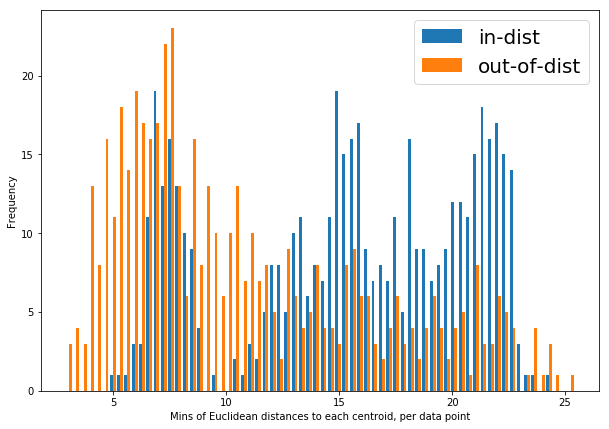

In [535]:
plt.figure(figsize=(10,7))
# plt.title("Siamese network confidence")
plt.hist([distFrac_avgImg_wIS, distFrac_avgImg_oOS], bins=70, label=['in-dist', 'out-of-dist'])
plt.legend(fontsize=20)
plt.ylabel("Frequency")
plt.xlabel("Mins of Euclidean distances to each centroid, per data point")
# plt.tight_layout()
# plt.savefig("10 way one shot VarianceL2 _ 608")
plt.show()

In [238]:
hist1, bins1 = np.histogram(distFrac_avgImg_wIS,bins=25)
hist2, bins2 = np.histogram(distFrac_avgImg_oOS,bins=25)
print return_intersection(hist1,hist2)

0.608
